In [1]:
import gym


In [2]:
# Filter tensorflow version warnings
import os
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
agent='CarRacing-v0'
#agent='MountainCar-v0'
#agent='Pendulum-v0'

In [4]:
env0 = gym.make(agent)
obs = env0.reset()
print(env0.action_space)
print(env0.observation_space)
print(obs.shape)

Track generation: 1159..1453 -> 294-tiles track
Discrete(5)
Box(96, 96, 3)
(96, 96, 3)


In [5]:
try:
    print(env0.action_space.high)
    print(env0.action_space.low)
except:
    print('discrete')
    print(env0.action_space.sample(),env0.action_space.sample(),env0.action_space.sample())    

discrete
4 0 3


In [6]:
print(min([min(r) for r in obs[:,:,0]]), max([max(r) for r in obs[:,:,0]]))
print(min([min(r) for r in obs[:,:,1]]), max([max(r) for r in obs[:,:,1]]))
print(min([min(r) for r in obs[:,:,2]]), max([max(r) for r in obs[:,:,2]]))

0 204
0 229
0 102


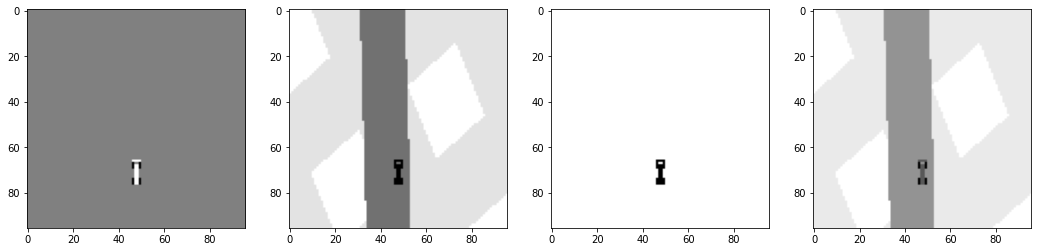

In [10]:
import numpy as np
from matplotlib import pyplot as plt
plt.subplots(1,4,figsize=(18,15))
plt.subplot(141)
plt.imshow(obs[:,:,0], cmap='gray')
plt.subplot(142)
plt.imshow(obs[:,:,1], cmap='gray')
plt.subplot(143)
plt.imshow(obs[:,:,2], cmap='gray')
plt.subplot(144)
obs2 = np.average(obs, weights=[0.299, 0.587, 0.114], axis=2)
plt.imshow(obs2, cmap='gray')


In [28]:
env0.close()

In [14]:
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, CnnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2 #, PPO1


In [8]:
# multiprocess environment
paralelo=1

if paralelo==1:
    env1 = gym.make(agent)
else:
    env1 = make_vec_env(agent, n_envs=paralelo)

obs = env1.reset()
print(obs.shape)

Track generation: 1236..1549 -> 313-tiles track
(96, 96, 3)


In [25]:
batch=512
updates=256
cont=False

if not cont:
    model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2, cliprange_vf=1) 
    #, nminibatches=paralelo)
    #model = PPO1(CnnPolicy, env1, verbose=1, timesteps_per_actorbatch=batch, n_cpu_tf_sess=2)

model.learn(total_timesteps=updates*batch*paralelo)


done by time
Track generation: 1237..1550 -> 313-tiles track
done by time
Track generation: 1196..1498 -> 302-tiles track
------------------------------------
| approxkl           | 0.003163655 |
| clipfrac           | 0.0390625   |
| explained_variance | 0.396       |
| fps                | 14          |
| n_updates          | 1           |
| policy_entropy     | 0.403874    |
| policy_loss        | -0.00398807 |
| serial_timesteps   | 256         |
| time_elapsed       | 3.08e-05    |
| total_timesteps    | 256         |
| value_loss         | 310.91833   |
------------------------------------
done by time
Track generation: 1175..1480 -> 305-tiles track
-------------------------------------
| approxkl           | 0.01177881   |
| clipfrac           | 0.19433594   |
| explained_variance | 0.59         |
| fps                | 14           |
| n_updates          | 2            |
| policy_entropy     | 0.6851691    |
| policy_loss        | -0.008612901 |
| serial_timesteps   | 512      

done by time
Track generation: 1206..1512 -> 306-tiles track
-------------------------------------
| approxkl           | 0.003806754  |
| clipfrac           | 0.0546875    |
| explained_variance | 0.295        |
| fps                | 15           |
| n_updates          | 16           |
| policy_entropy     | 0.5387456    |
| policy_loss        | -0.006048332 |
| serial_timesteps   | 4096         |
| time_elapsed       | 244          |
| total_timesteps    | 4096         |
| value_loss         | 168.68306    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0013324681  |
| clipfrac           | 0.021484375   |
| explained_variance | 0.174         |
| fps                | 16            |
| n_updates          | 17            |
| policy_entropy     | 0.1987926     |
| policy_loss        | -0.0018227516 |
| serial_timesteps   | 4352          |
| time_elapsed       | 261           |
| total_timesteps    | 4352          |
| value_loss    

-------------------------------------
| approxkl           | 0.0035162433 |
| clipfrac           | 0.04296875   |
| explained_variance | 0.853        |
| fps                | 15           |
| n_updates          | 32           |
| policy_entropy     | 0.5536256    |
| policy_loss        | -0.005120448 |
| serial_timesteps   | 8192         |
| time_elapsed       | 511          |
| total_timesteps    | 8192         |
| value_loss         | 8.43313      |
-------------------------------------
--------------------------------------
| approxkl           | 0.000606474   |
| clipfrac           | 0.0068359375  |
| explained_variance | 0.742         |
| fps                | 14            |
| n_updates          | 33            |
| policy_entropy     | 0.1386796     |
| policy_loss        | -0.0012936224 |
| serial_timesteps   | 8448          |
| time_elapsed       | 528           |
| total_timesteps    | 8448          |
| value_loss         | 4.541884      |
--------------------------------------

--------------------------------------
| approxkl           | 0.0063100555  |
| clipfrac           | 0.06640625    |
| explained_variance | 0.183         |
| fps                | 15            |
| n_updates          | 47            |
| policy_entropy     | 0.4231893     |
| policy_loss        | -0.0044444455 |
| serial_timesteps   | 12032         |
| time_elapsed       | 776           |
| total_timesteps    | 12032         |
| value_loss         | 4.5607486     |
--------------------------------------
Track generation: 1132..1419 -> 287-tiles track
---------------------------------------
| approxkl           | 0.0013949942   |
| clipfrac           | 0.013671875    |
| explained_variance | 0.623          |
| fps                | 12             |
| n_updates          | 48             |
| policy_entropy     | 0.23024513     |
| policy_loss        | -0.00082595274 |
| serial_timesteps   | 12288          |
| time_elapsed       | 792            |
| total_timesteps    | 12288          |
| val

done by time
Track generation: 1136..1424 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0034611807  |
| clipfrac           | 0.048828125   |
| explained_variance | 0.55          |
| fps                | 14            |
| n_updates          | 63            |
| policy_entropy     | 0.23756826    |
| policy_loss        | -0.0032924614 |
| serial_timesteps   | 16128         |
| time_elapsed       | 1.07e+03      |
| total_timesteps    | 16128         |
| value_loss         | 88.37023      |
--------------------------------------
Track generation: 1156..1450 -> 294-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
--------------------------------------
| approxkl           | 0.0065818583  |
| clipfrac           | 0.05859375    |
| explained_variance | 0.521         |
| fps                | 13            |
| n_updates          | 64            |
| policy_entropy     | 0.49053675    |
| policy_loss        | -0.0049615866 |
| serial_ti

done by time
Track generation: 1068..1343 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1106..1394 -> 288-tiles track
-------------------------------------
| approxkl           | 0.0006123274 |
| clipfrac           | 0.0009765625 |
| explained_variance | 0.715        |
| fps                | 9            |
| n_updates          | 78           |
| policy_entropy     | 0.60081273   |
| policy_loss        | 0.002103833  |
| serial_timesteps   | 19968        |
| time_elapsed       | 1.42e+03     |
| total_timesteps    | 19968        |
| value_loss         | 99.39621     |
-------------------------------------
--------------------------------------
| approxkl           | 0.003463417   |
| clipfrac           | 0.043945312   |
| explained_variance | 0.673         |
| fps                | 9             |
| n_updates          | 79            |
| policy_entropy     | 0.65689427    |
| policy_loss        | -0.0020796657 |
| serial_time

done by time
Track generation: 1191..1493 -> 302-tiles track
--------------------------------------
| approxkl           | 0.0030456332  |
| clipfrac           | 0.04296875    |
| explained_variance | 0.603         |
| fps                | 19            |
| n_updates          | 93            |
| policy_entropy     | 0.72586536    |
| policy_loss        | -0.0031049054 |
| serial_timesteps   | 23808         |
| time_elapsed       | 1.7e+03       |
| total_timesteps    | 23808         |
| value_loss         | 90.99802      |
--------------------------------------
done by time
Track generation: 1075..1348 -> 273-tiles track
-------------------------------------
| approxkl           | 0.010914732  |
| clipfrac           | 0.12792969   |
| explained_variance | 0.754        |
| fps                | 19           |
| n_updates          | 94           |
| policy_entropy     | 0.77285194   |
| policy_loss        | 0.0023570852 |
| serial_timesteps   | 24064        |
| time_elapsed       | 1.72e+

-------------------------------------
| approxkl           | 0.0012819498 |
| clipfrac           | 0.016601562  |
| explained_variance | 0.8          |
| fps                | 22           |
| n_updates          | 108          |
| policy_entropy     | 0.27684265   |
| policy_loss        | -0.006984732 |
| serial_timesteps   | 27648        |
| time_elapsed       | 1.9e+03      |
| total_timesteps    | 27648        |
| value_loss         | 15.989884    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0015732059   |
| clipfrac           | 0.016601562    |
| explained_variance | 0.888          |
| fps                | 23             |
| n_updates          | 109            |
| policy_entropy     | 0.34060177     |
| policy_loss        | -2.2501335e-05 |
| serial_timesteps   | 27904          |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 27904          |
| value_loss         | 14.013009      |
--------------------------

---------------------------------------
| approxkl           | 0.003523031    |
| clipfrac           | 0.04296875     |
| explained_variance | 0.923          |
| fps                | 21             |
| n_updates          | 123            |
| policy_entropy     | 0.3310684      |
| policy_loss        | -0.00023474358 |
| serial_timesteps   | 31488          |
| time_elapsed       | 2.09e+03       |
| total_timesteps    | 31488          |
| value_loss         | 7.0753818      |
---------------------------------------
done by time
Track generation: 1051..1318 -> 267-tiles track
--------------------------------------
| approxkl           | 0.005084599   |
| clipfrac           | 0.076171875   |
| explained_variance | 0.641         |
| fps                | 17            |
| n_updates          | 124           |
| policy_entropy     | 0.31636688    |
| policy_loss        | -0.0030985186 |
| serial_timesteps   | 31744         |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 31744 

done by time
Track generation: 1247..1563 -> 316-tiles track
--------------------------------------
| approxkl           | 0.0012206633  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.583         |
| fps                | 15            |
| n_updates          | 138           |
| policy_entropy     | 0.4172703     |
| policy_loss        | -0.0067570633 |
| serial_timesteps   | 35328         |
| time_elapsed       | 2.33e+03      |
| total_timesteps    | 35328         |
| value_loss         | 105.49608     |
--------------------------------------
done by time
Track generation: 1247..1563 -> 316-tiles track
-------------------------------------
| approxkl           | 0.008883061  |
| clipfrac           | 0.12695312   |
| explained_variance | 0.661        |
| fps                | 14           |
| n_updates          | 139          |
| policy_entropy     | 0.6131336    |
| policy_loss        | -0.021448035 |
| serial_timesteps   | 35584        |
| time_elapsed       | 2.35e+

--------------------------------------
| approxkl           | 0.0037003497  |
| clipfrac           | 0.037109375   |
| explained_variance | 0.871         |
| fps                | 17            |
| n_updates          | 153           |
| policy_entropy     | 0.5817041     |
| policy_loss        | -0.0014293661 |
| serial_timesteps   | 39168         |
| time_elapsed       | 2.58e+03      |
| total_timesteps    | 39168         |
| value_loss         | 10.533776     |
--------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0033177927 |
| clipfrac           | 0.03125      |
| explained_variance | 0.429        |
| fps                | 16           |
| n_updates          | 154          |
| policy_entropy     | 0.5312087    |
| policy_loss        | -0.012001503 |
| serial_timesteps   | 39424        |
| time_elapsed       | 2.59e+03     |
| total_timesteps    | 39424        |
| value_loss  

--------------------------------------
| approxkl           | 0.004592419   |
| clipfrac           | 0.068359375   |
| explained_variance | 0.896         |
| fps                | 17            |
| n_updates          | 168           |
| policy_entropy     | 0.36601502    |
| policy_loss        | -0.0039805733 |
| serial_timesteps   | 43008         |
| time_elapsed       | 2.81e+03      |
| total_timesteps    | 43008         |
| value_loss         | 10.096126     |
--------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0026428837 |
| clipfrac           | 0.037109375  |
| explained_variance | 0.658        |
| fps                | 15           |
| n_updates          | 169          |
| policy_entropy     | 0.7382665    |
| policy_loss        | -0.005559518 |
| serial_timesteps   | 43264        |
| time_elapsed       | 2.83e+03     |
| total_timesteps    | 43264        |
| value_loss  

done by time
Track generation: 1074..1354 -> 280-tiles track
--------------------------------------
| approxkl           | 0.0015649043  |
| clipfrac           | 0.016601562   |
| explained_variance | 0.661         |
| fps                | 15            |
| n_updates          | 183           |
| policy_entropy     | 0.80300486    |
| policy_loss        | -0.0062505156 |
| serial_timesteps   | 46848         |
| time_elapsed       | 3.05e+03      |
| total_timesteps    | 46848         |
| value_loss         | 92.49897      |
--------------------------------------
--------------------------------------
| approxkl           | 0.002804336   |
| clipfrac           | 0.033203125   |
| explained_variance | 0.986         |
| fps                | 18            |
| n_updates          | 184           |
| policy_entropy     | 0.6903821     |
| policy_loss        | -0.0039702654 |
| serial_timesteps   | 47104         |
| time_elapsed       | 3.06e+03      |
| total_timesteps    | 47104         |
| v

done by time
Track generation: 1052..1323 -> 271-tiles track
-------------------------------------
| approxkl           | 0.008786255  |
| clipfrac           | 0.07324219   |
| explained_variance | 0.417        |
| fps                | 21           |
| n_updates          | 198          |
| policy_entropy     | 0.75226      |
| policy_loss        | -0.013601857 |
| serial_timesteps   | 50688        |
| time_elapsed       | 3.27e+03     |
| total_timesteps    | 50688        |
| value_loss         | 64.695526    |
-------------------------------------
done by time
Track generation: 1095..1373 -> 278-tiles track
------------------------------------
| approxkl           | 0.008217427 |
| clipfrac           | 0.16992188  |
| explained_variance | 0.574       |
| fps                | 19          |
| n_updates          | 199         |
| policy_entropy     | 0.7280841   |
| policy_loss        | 0.010525055 |
| serial_timesteps   | 50944       |
| time_elapsed       | 3.28e+03    |
| total_timest

--------------------------------------
| approxkl           | 0.0039742943  |
| clipfrac           | 0.041992188   |
| explained_variance | 0.508         |
| fps                | 17            |
| n_updates          | 213           |
| policy_entropy     | 0.6291929     |
| policy_loss        | -0.0060776537 |
| serial_timesteps   | 54528         |
| time_elapsed       | 3.48e+03      |
| total_timesteps    | 54528         |
| value_loss         | 9.394049      |
--------------------------------------
Track generation: 1050..1317 -> 267-tiles track
--------------------------------------
| approxkl           | 0.005556149   |
| clipfrac           | 0.087890625   |
| explained_variance | 0.472         |
| fps                | 20            |
| n_updates          | 214           |
| policy_entropy     | 0.56969965    |
| policy_loss        | -0.0015662896 |
| serial_timesteps   | 54784         |
| time_elapsed       | 3.49e+03      |
| total_timesteps    | 54784         |
| value_loss    

done by time
Track generation: 1104..1384 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0038984132 |
| clipfrac           | 0.056640625  |
| explained_variance | 0.514        |
| fps                | 16           |
| n_updates          | 228          |
| policy_entropy     | 0.61517155   |
| policy_loss        | -0.008326219 |
| serial_timesteps   | 58368        |
| time_elapsed       | 3.7e+03      |
| total_timesteps    | 58368        |
| value_loss         | 131.98947    |
-------------------------------------
done by time
Track generation: 1229..1540 -> 311-tiles track
-------------------------------------
| approxkl           | 0.008400317  |
| clipfrac           | 0.10839844   |
| explained_variance | 0.458        |
| fps                | 16           |
| n_updates          | 229          |
| policy_entropy     | 0.9339793    |
| policy_loss        | 0.0016436523 |
| serial_timesteps   | 58624        |
| time_elapsed       | 3.71e+03     |
| to

done by time
Track generation: 1306..1636 -> 330-tiles track
-------------------------------------
| approxkl           | 0.0035151758 |
| clipfrac           | 0.059570312  |
| explained_variance | 0.499        |
| fps                | 15           |
| n_updates          | 244          |
| policy_entropy     | 0.69166523   |
| policy_loss        | -0.004429314 |
| serial_timesteps   | 62464        |
| time_elapsed       | 3.94e+03     |
| total_timesteps    | 62464        |
| value_loss         | 137.39221    |
-------------------------------------
done by time
Track generation: 1230..1542 -> 312-tiles track
-------------------------------------
| approxkl           | 0.0155592095 |
| clipfrac           | 0.16699219   |
| explained_variance | 0.494        |
| fps                | 15           |
| n_updates          | 245          |
| policy_entropy     | 0.81475496   |
| policy_loss        | -0.017215814 |
| serial_timesteps   | 62720        |
| time_elapsed       | 3.96e+03     |
| to

------------------------------------
| approxkl           | 0.005958069 |
| clipfrac           | 0.091796875 |
| explained_variance | 0.871       |
| fps                | 21          |
| n_updates          | 260         |
| policy_entropy     | 0.47795165  |
| policy_loss        | 0.003232648 |
| serial_timesteps   | 66560       |
| time_elapsed       | 4.16e+03    |
| total_timesteps    | 66560       |
| value_loss         | 2.2139266   |
------------------------------------
--------------------------------------
| approxkl           | 0.0028440324  |
| clipfrac           | 0.041015625   |
| explained_variance | 0.95          |
| fps                | 21            |
| n_updates          | 261           |
| policy_entropy     | 0.38579282    |
| policy_loss        | -0.0026276542 |
| serial_timesteps   | 66816         |
| time_elapsed       | 4.18e+03      |
| total_timesteps    | 66816         |
| value_loss         | 1.8792218     |
--------------------------------------
done by time

--------------------------------------
| approxkl           | 0.0019240626  |
| clipfrac           | 0.025390625   |
| explained_variance | 0.0317        |
| fps                | 21            |
| n_updates          | 276           |
| policy_entropy     | 0.5329393     |
| policy_loss        | -0.0018612676 |
| serial_timesteps   | 70656         |
| time_elapsed       | 4.37e+03      |
| total_timesteps    | 70656         |
| value_loss         | 5.5008225     |
--------------------------------------
Track generation: 1172..1469 -> 297-tiles track
--------------------------------------
| approxkl           | 0.009207771   |
| clipfrac           | 0.1171875     |
| explained_variance | 0.555         |
| fps                | 19            |
| n_updates          | 277           |
| policy_entropy     | 0.52412516    |
| policy_loss        | -0.0076867845 |
| serial_timesteps   | 70912         |
| time_elapsed       | 4.38e+03      |
| total_timesteps    | 70912         |
| value_loss    

-------------------------------------
| approxkl           | 0.008462043  |
| clipfrac           | 0.09277344   |
| explained_variance | 0.591        |
| fps                | 22           |
| n_updates          | 292          |
| policy_entropy     | 0.7622074    |
| policy_loss        | -0.013931599 |
| serial_timesteps   | 74752        |
| time_elapsed       | 4.57e+03     |
| total_timesteps    | 74752        |
| value_loss         | 1.9902327    |
-------------------------------------
--------------------------------------
| approxkl           | 0.008086753   |
| clipfrac           | 0.10449219    |
| explained_variance | -1.19         |
| fps                | 20            |
| n_updates          | 293           |
| policy_entropy     | 0.8953311     |
| policy_loss        | -0.0065986784 |
| serial_timesteps   | 75008         |
| time_elapsed       | 4.58e+03      |
| total_timesteps    | 75008         |
| value_loss         | 0.74981564    |
--------------------------------------

Track generation: 1101..1380 -> 279-tiles track
-------------------------------------
| approxkl           | 0.004473548  |
| clipfrac           | 0.056640625  |
| explained_variance | 0.288        |
| fps                | 21           |
| n_updates          | 308          |
| policy_entropy     | 1.1285883    |
| policy_loss        | 0.0023645328 |
| serial_timesteps   | 78848        |
| time_elapsed       | 4.76e+03     |
| total_timesteps    | 78848        |
| value_loss         | 2.1797903    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0045990674 |
| clipfrac           | 0.026367188  |
| explained_variance | 0.434        |
| fps                | 20           |
| n_updates          | 309          |
| policy_entropy     | 1.1345816    |
| policy_loss        | 0.002008446  |
| serial_timesteps   | 79104        |
| time_elapsed       | 4.77e+03     |
| total_timesteps    | 79104        |
| value_loss         | 0.17554307   |
--

Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
--------------------------------------
| approxkl           | 0.0010086729  |
| clipfrac           | 0.0029296875  |
| explained_variance | 0.0288        |
| fps                | 17            |
| n_updates          | 324           |
| policy_entropy     | 0.70513296    |
| policy_loss        | -0.0014158136 |
| serial_timesteps   | 82944         |
| time_elapsed       | 4.96e+03      |
| total_timesteps    | 82944         |
| value_loss         | 201.97429     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0014344756 |
| clipfrac           | 0.0068359375 |
| explained_variance | 0.319        |
| fps                | 21           |
| n_updates          | 325          |
| policy_entropy     | 0.8540694    |
| policy_loss        | -0.002132785 |
| serial_timesteps   | 83200        |
| time_elapsed       | 4.98e+03     |
| to

done by time
Track generation: 1008..1266 -> 258-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1118..1402 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1089..1365 -> 276-tiles track
-------------------------------------
| approxkl           | 0.009563331  |
| clipfrac           | 0.10644531   |
| explained_variance | 0.404        |
| fps                | 19           |
| n_updates          | 340          |
| policy_entropy     | 1.1946607    |
| policy_loss        | -0.009415183 |
| serial_timesteps   | 87040        |
| time_elapsed       | 5.16e+03     |
| total_timesteps    | 87040        |
| value_loss         | 133.31088    |
-------------------------------------
--------------------------------------
| approxkl           | 0.009278059   |
| clipfrac           | 0.12792969    |
| explained_variance | -0.923        |
| fps                | 23            |
| n_update

Track generation: 1090..1371 -> 281-tiles track
--------------------------------------
| approxkl           | 0.003592511   |
| clipfrac           | 0.05859375    |
| explained_variance | -0.0131       |
| fps                | 19            |
| n_updates          | 356           |
| policy_entropy     | 0.97944003    |
| policy_loss        | 0.00047972362 |
| serial_timesteps   | 91136         |
| time_elapsed       | 5.36e+03      |
| total_timesteps    | 91136         |
| value_loss         | 2.7759392     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0040886104  |
| clipfrac           | 0.06542969    |
| explained_variance | 0.422         |
| fps                | 19            |
| n_updates          | 357           |
| policy_entropy     | 0.9950067     |
| policy_loss        | -0.0040941453 |
| serial_timesteps   | 91392         |
| time_elapsed       | 5.37e+03      |
| total_timesteps    | 91392         |
| value_loss    

-------------------------------------
| approxkl           | 0.0049517374 |
| clipfrac           | 0.06738281   |
| explained_variance | 0.645        |
| fps                | 23           |
| n_updates          | 372          |
| policy_entropy     | 0.60885614   |
| policy_loss        | -0.012380535 |
| serial_timesteps   | 95232        |
| time_elapsed       | 5.56e+03     |
| total_timesteps    | 95232        |
| value_loss         | 1.51839      |
-------------------------------------
Track generation: 1126..1412 -> 286-tiles track
--------------------------------------
| approxkl           | 0.0027279507  |
| clipfrac           | 0.034179688   |
| explained_variance | 0.555         |
| fps                | 19            |
| n_updates          | 373           |
| policy_entropy     | 0.65238416    |
| policy_loss        | -0.0031795623 |
| serial_timesteps   | 95488         |
| time_elapsed       | 5.57e+03      |
| total_timesteps    | 95488         |
| value_loss         | 3.3996

done by time
Track generation: 1259..1578 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0100045595 |
| clipfrac           | 0.14160156   |
| explained_variance | 0.483        |
| fps                | 18           |
| n_updates          | 388          |
| policy_entropy     | 0.9450191    |
| policy_loss        | -0.012105226 |
| serial_timesteps   | 99328        |
| time_elapsed       | 5.76e+03     |
| total_timesteps    | 99328        |
| value_loss         | 136.81288    |
-------------------------------------
done by time
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 0.0037244353  |
| clipfrac           | 0.046875      |
| explained_variance | 0.184         |
| fps                | 18            |
| n_updates          | 389           |
| policy_entropy     | 0.7035636     |
| policy_loss        | -0.0032149823 |
| serial_timesteps   | 99584         |
| time_elapsed       | 5.77e+03  

done by time
Track generation: 1096..1374 -> 278-tiles track
--------------------------------------
| approxkl           | 0.00050244585 |
| clipfrac           | 0.0068359375  |
| explained_variance | 0.455         |
| fps                | 19            |
| n_updates          | 403           |
| policy_entropy     | 0.4871771     |
| policy_loss        | 0.00055185915 |
| serial_timesteps   | 103168        |
| time_elapsed       | 5.95e+03      |
| total_timesteps    | 103168        |
| value_loss         | 150.90208     |
--------------------------------------
done by time
Track generation: 1201..1504 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0009514241 |
| clipfrac           | 0.0029296875 |
| explained_variance | 0.535        |
| fps                | 17           |
| n_updates          | 404          |
| policy_entropy     | 0.6163818    |
| policy_loss        | 0.0005786891 |
| serial_timesteps   | 103424       |
| time_elapsed       | 5.97e+

done by time
Track generation: 1123..1417 -> 294-tiles track
-------------------------------------
| approxkl           | 0.006930751  |
| clipfrac           | 0.08984375   |
| explained_variance | 0.293        |
| fps                | 20           |
| n_updates          | 419          |
| policy_entropy     | 0.5614194    |
| policy_loss        | -0.011652487 |
| serial_timesteps   | 107264       |
| time_elapsed       | 6.16e+03     |
| total_timesteps    | 107264       |
| value_loss         | 170.96783    |
-------------------------------------
done by time
Track generation: 1332..1669 -> 337-tiles track
--------------------------------------
| approxkl           | 0.0051385844  |
| clipfrac           | 0.06640625    |
| explained_variance | 0.495         |
| fps                | 18            |
| n_updates          | 420           |
| policy_entropy     | 0.78934306    |
| policy_loss        | -0.0056841304 |
| serial_timesteps   | 107520        |
| time_elapsed       | 6.17e+03  

done by time
Track generation: 1077..1351 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1177..1475 -> 298-tiles track
-------------------------------------
| approxkl           | 0.006007363  |
| clipfrac           | 0.09277344   |
| explained_variance | 0.382        |
| fps                | 18           |
| n_updates          | 435          |
| policy_entropy     | 1.1805854    |
| policy_loss        | -0.010869845 |
| serial_timesteps   | 111360       |
| time_elapsed       | 6.36e+03     |
| total_timesteps    | 111360       |
| value_loss         | 142.6962     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0025386661  |
| clipfrac           | 0.030273438   |
| explained_variance | 0.892         |
| fps                | 24            |
| n_updates          | 436           |
| policy_entropy     | 0.7282617     |
| policy_loss        | -0.0011208553 |
| serial_time

-------------------------------------
| approxkl           | 0.012242754  |
| clipfrac           | 0.20996094   |
| explained_variance | 0.4          |
| fps                | 23           |
| n_updates          | 451          |
| policy_entropy     | 0.8721875    |
| policy_loss        | -0.015697466 |
| serial_timesteps   | 115456       |
| time_elapsed       | 6.56e+03     |
| total_timesteps    | 115456       |
| value_loss         | 0.58998907   |
-------------------------------------
-------------------------------------
| approxkl           | 0.009432743  |
| clipfrac           | 0.119140625  |
| explained_variance | -1.11        |
| fps                | 21           |
| n_updates          | 452          |
| policy_entropy     | 0.8561974    |
| policy_loss        | -0.013003696 |
| serial_timesteps   | 115712       |
| time_elapsed       | 6.57e+03     |
| total_timesteps    | 115712       |
| value_loss         | 0.68140715   |
-------------------------------------
Track genera

--------------------------------------
| approxkl           | 0.009086335   |
| clipfrac           | 0.09082031    |
| explained_variance | 0.0752        |
| fps                | 22            |
| n_updates          | 467           |
| policy_entropy     | 0.91237485    |
| policy_loss        | -0.0031232843 |
| serial_timesteps   | 119552        |
| time_elapsed       | 6.75e+03      |
| total_timesteps    | 119552        |
| value_loss         | 0.5174723     |
--------------------------------------
Track generation: 1028..1289 -> 261-tiles track
--------------------------------------
| approxkl           | 0.006548493   |
| clipfrac           | 0.07714844    |
| explained_variance | 0.398         |
| fps                | 20            |
| n_updates          | 468           |
| policy_entropy     | 0.78639835    |
| policy_loss        | -0.0112515325 |
| serial_timesteps   | 119808        |
| time_elapsed       | 6.76e+03      |
| total_timesteps    | 119808        |
| value_loss    

-------------------------------------
| approxkl           | 0.010161085  |
| clipfrac           | 0.1796875    |
| explained_variance | -1           |
| fps                | 24           |
| n_updates          | 483          |
| policy_entropy     | 0.7639369    |
| policy_loss        | -0.012874011 |
| serial_timesteps   | 123648       |
| time_elapsed       | 6.95e+03     |
| total_timesteps    | 123648       |
| value_loss         | 1.0866103    |
-------------------------------------
Track generation: 1174..1477 -> 303-tiles track
--------------------------------------
| approxkl           | 0.001596397   |
| clipfrac           | 0.009765625   |
| explained_variance | -0.153        |
| fps                | 20            |
| n_updates          | 484           |
| policy_entropy     | 0.80592304    |
| policy_loss        | -0.0031710702 |
| serial_timesteps   | 123904        |
| time_elapsed       | 6.96e+03      |
| total_timesteps    | 123904        |
| value_loss         | 3.2039

-------------------------------------
| approxkl           | 0.010677973  |
| clipfrac           | 0.17578125   |
| explained_variance | 0.363        |
| fps                | 22           |
| n_updates          | 499          |
| policy_entropy     | 0.88987255   |
| policy_loss        | -0.010066175 |
| serial_timesteps   | 127744       |
| time_elapsed       | 7.15e+03     |
| total_timesteps    | 127744       |
| value_loss         | 0.8895481    |
-------------------------------------
Track generation: 1225..1541 -> 316-tiles track
--------------------------------------
| approxkl           | 0.008586934   |
| clipfrac           | 0.09082031    |
| explained_variance | 0.0214        |
| fps                | 17            |
| n_updates          | 500           |
| policy_entropy     | 0.95372134    |
| policy_loss        | -0.0022258065 |
| serial_timesteps   | 128000        |
| time_elapsed       | 7.16e+03      |
| total_timesteps    | 128000        |
| value_loss         | 2.4528

done by time
Track generation: 1034..1307 -> 273-tiles track
--------------------------------------
| approxkl           | 0.008368987   |
| clipfrac           | 0.111328125   |
| explained_variance | 0.496         |
| fps                | 20            |
| n_updates          | 515           |
| policy_entropy     | 0.92842734    |
| policy_loss        | -0.0042473148 |
| serial_timesteps   | 131840        |
| time_elapsed       | 7.35e+03      |
| total_timesteps    | 131840        |
| value_loss         | 145.05711     |
--------------------------------------
-------------------------------------
| approxkl           | 0.004703233  |
| clipfrac           | 0.07421875   |
| explained_variance | 0.792        |
| fps                | 20           |
| n_updates          | 516          |
| policy_entropy     | 0.47394618   |
| policy_loss        | -0.002159329 |
| serial_timesteps   | 132096       |
| time_elapsed       | 7.37e+03     |
| total_timesteps    | 132096       |
| value_loss  

Track generation: 1096..1374 -> 278-tiles track
---------------------------------------
| approxkl           | 0.00058195763  |
| clipfrac           | 0.0048828125   |
| explained_variance | -0.838         |
| fps                | 18             |
| n_updates          | 531            |
| policy_entropy     | 0.5798684      |
| policy_loss        | -0.00032190705 |
| serial_timesteps   | 135936         |
| time_elapsed       | 7.55e+03       |
| total_timesteps    | 135936         |
| value_loss         | 4.2687764      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0017883934  |
| clipfrac           | 0.017578125   |
| explained_variance | 0.823         |
| fps                | 22            |
| n_updates          | 532           |
| policy_entropy     | 0.61996996    |
| policy_loss        | -0.0015283086 |
| serial_timesteps   | 136192        |
| time_elapsed       | 7.56e+03      |
| total_timesteps    | 136192        |
| v

---------------------------------------
| approxkl           | 0.0029187056   |
| clipfrac           | 0.036132812    |
| explained_variance | 0.565          |
| fps                | 19             |
| n_updates          | 547            |
| policy_entropy     | 0.49092415     |
| policy_loss        | -0.00026131392 |
| serial_timesteps   | 140032         |
| time_elapsed       | 7.75e+03       |
| total_timesteps    | 140032         |
| value_loss         | 6.822109       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0122849215 |
| clipfrac           | 0.18066406   |
| explained_variance | 0.652        |
| fps                | 23           |
| n_updates          | 548          |
| policy_entropy     | 0.7309771    |
| policy_loss        | -0.016074933 |
| serial_timesteps   | 140288       |
| time_elapsed       | 7.77e+03     |
| total_timesteps    | 140288       |
| value_loss         | 3.6406994    |
------------------------

--------------------------------------
| approxkl           | 0.0012514485  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.811         |
| fps                | 20            |
| n_updates          | 563           |
| policy_entropy     | 0.80264777    |
| policy_loss        | -0.0030265138 |
| serial_timesteps   | 144128        |
| time_elapsed       | 7.96e+03      |
| total_timesteps    | 144128        |
| value_loss         | 5.1143465     |
--------------------------------------
done by time
Track generation: 987..1247 -> 260-tiles track
--------------------------------------
| approxkl           | 0.00069187704 |
| clipfrac           | 0.0           |
| explained_variance | 0.457         |
| fps                | 19            |
| n_updates          | 564           |
| policy_entropy     | 0.93727607    |
| policy_loss        | 0.00058999145 |
| serial_timesteps   | 144384        |
| time_elapsed       | 7.97e+03      |
| total_timesteps    | 144384        |
| va

--------------------------------------
| approxkl           | 0.004660774   |
| clipfrac           | 0.047851562   |
| explained_variance | 0.153         |
| fps                | 22            |
| n_updates          | 579           |
| policy_entropy     | 0.9764517     |
| policy_loss        | -0.0066467216 |
| serial_timesteps   | 148224        |
| time_elapsed       | 8.15e+03      |
| total_timesteps    | 148224        |
| value_loss         | 0.6242825     |
--------------------------------------
Track generation: 1387..1738 -> 351-tiles track
--------------------------------------
| approxkl           | 0.006432843   |
| clipfrac           | 0.123046875   |
| explained_variance | 0.921         |
| fps                | 18            |
| n_updates          | 580           |
| policy_entropy     | 0.74899286    |
| policy_loss        | -0.0071786623 |
| serial_timesteps   | 148480        |
| time_elapsed       | 8.17e+03      |
| total_timesteps    | 148480        |
| value_loss    

Track generation: 1295..1631 -> 336-tiles track
-------------------------------------
| approxkl           | 0.003804945  |
| clipfrac           | 0.052734375  |
| explained_variance | 0.65         |
| fps                | 19           |
| n_updates          | 595          |
| policy_entropy     | 0.8083468    |
| policy_loss        | -0.003731534 |
| serial_timesteps   | 152320       |
| time_elapsed       | 8.36e+03     |
| total_timesteps    | 152320       |
| value_loss         | 3.013533     |
-------------------------------------
--------------------------------------
| approxkl           | 0.011187995   |
| clipfrac           | 0.16503906    |
| explained_variance | -0.433        |
| fps                | 17            |
| n_updates          | 596           |
| policy_entropy     | 0.68482125    |
| policy_loss        | -0.0035909463 |
| serial_timesteps   | 152576        |
| time_elapsed       | 8.37e+03      |
| total_timesteps    | 152576        |
| value_loss         | 1.9417

-------------------------------------
| approxkl           | 0.0106377555 |
| clipfrac           | 0.16113281   |
| explained_variance | 0.179        |
| fps                | 23           |
| n_updates          | 611          |
| policy_entropy     | 0.9250053    |
| policy_loss        | 0.0012377598 |
| serial_timesteps   | 156416       |
| time_elapsed       | 8.56e+03     |
| total_timesteps    | 156416       |
| value_loss         | 0.33559513   |
-------------------------------------
-------------------------------------
| approxkl           | 0.012532841  |
| clipfrac           | 0.15917969   |
| explained_variance | -0.446       |
| fps                | 20           |
| n_updates          | 612          |
| policy_entropy     | 0.948026     |
| policy_loss        | -0.011301033 |
| serial_timesteps   | 156672       |
| time_elapsed       | 8.57e+03     |
| total_timesteps    | 156672       |
| value_loss         | 0.43460715   |
-------------------------------------
Track genera

Track generation: 1154..1447 -> 293-tiles track
--------------------------------------
| approxkl           | 0.0031901207  |
| clipfrac           | 0.03515625    |
| explained_variance | 0.587         |
| fps                | 19            |
| n_updates          | 627           |
| policy_entropy     | 0.806508      |
| policy_loss        | -0.0067897933 |
| serial_timesteps   | 160512        |
| time_elapsed       | 8.76e+03      |
| total_timesteps    | 160512        |
| value_loss         | 3.3295112     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0043535116  |
| clipfrac           | 0.044921875   |
| explained_variance | 0.114         |
| fps                | 21            |
| n_updates          | 628           |
| policy_entropy     | 0.79255676    |
| policy_loss        | -0.0018743365 |
| serial_timesteps   | 160768        |
| time_elapsed       | 8.77e+03      |
| total_timesteps    | 160768        |
| value_loss    

--------------------------------------
| approxkl           | 0.006302274   |
| clipfrac           | 0.09082031    |
| explained_variance | -0.113        |
| fps                | 20            |
| n_updates          | 643           |
| policy_entropy     | 0.75301784    |
| policy_loss        | -0.0128163695 |
| serial_timesteps   | 164608        |
| time_elapsed       | 8.96e+03      |
| total_timesteps    | 164608        |
| value_loss         | 1.4348053     |
--------------------------------------
Track generation: 1195..1498 -> 303-tiles track
--------------------------------------
| approxkl           | 0.001556528   |
| clipfrac           | 0.016601562   |
| explained_variance | 0.0065        |
| fps                | 20            |
| n_updates          | 644           |
| policy_entropy     | 0.667         |
| policy_loss        | -0.0017014841 |
| serial_timesteps   | 164864        |
| time_elapsed       | 8.97e+03      |
| total_timesteps    | 164864        |
| value_loss    

done by time
Track generation: 1025..1288 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1119..1403 -> 284-tiles track
-------------------------------------
| approxkl           | 0.003266152  |
| clipfrac           | 0.038085938  |
| explained_variance | 0.484        |
| fps                | 19           |
| n_updates          | 659          |
| policy_entropy     | 0.74816453   |
| policy_loss        | -0.012985295 |
| serial_timesteps   | 168704       |
| time_elapsed       | 9.15e+03     |
| total_timesteps    | 168704       |
| value_loss         | 144.80385    |
-------------------------------------
done by time
Track generation: 1324..1659 -> 335-tiles track
--------------------------------------
| approxkl           | 0.0037648503  |
| clipfrac           | 0.032226562   |
| explained_variance | 0.193         |
| fps                | 18            |
| n_updates          | 660           |
| policy_entropy     | 0.62578

done by time
Track generation: 1032..1296 -> 264-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1349..1700 -> 351-tiles track
-------------------------------------
| approxkl           | 0.011561169  |
| clipfrac           | 0.22070312   |
| explained_variance | 0.0467       |
| fps                | 19           |
| n_updates          | 675          |
| policy_entropy     | 1.0422623    |
| policy_loss        | -0.004126565 |
| serial_timesteps   | 172800       |
| time_elapsed       | 9.36e+03     |
| total_timesteps    | 172800       |
| value_loss         | 198.58737    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0065629715  |
| clipfrac           | 0.10644531    |
| explained_variance | 0.71          |
| fps                | 20            |
| n_updates          | 676           |
| policy_entropy     | 0.9384299     |
| policy_loss        | -0.0093448665 |
| serial_time

-------------------------------------
| approxkl           | 0.0031170729 |
| clipfrac           | 0.046875     |
| explained_variance | 0.198        |
| fps                | 24           |
| n_updates          | 691          |
| policy_entropy     | 0.8687154    |
| policy_loss        | -0.005935526 |
| serial_timesteps   | 176896       |
| time_elapsed       | 9.55e+03     |
| total_timesteps    | 176896       |
| value_loss         | 0.8915847    |
-------------------------------------
done by time
Track generation: 1070..1349 -> 279-tiles track
--------------------------------------
| approxkl           | 0.0030852198  |
| clipfrac           | 0.037109375   |
| explained_variance | 0.415         |
| fps                | 17            |
| n_updates          | 692           |
| policy_entropy     | 1.0612336     |
| policy_loss        | -0.0056294706 |
| serial_timesteps   | 177152        |
| time_elapsed       | 9.56e+03      |
| total_timesteps    | 177152        |
| value_loss    

--------------------------------------
| approxkl           | 0.0036965564  |
| clipfrac           | 0.052734375   |
| explained_variance | 0.802         |
| fps                | 22            |
| n_updates          | 707           |
| policy_entropy     | 0.4942147     |
| policy_loss        | -0.0031428952 |
| serial_timesteps   | 180992        |
| time_elapsed       | 9.75e+03      |
| total_timesteps    | 180992        |
| value_loss         | 3.5318336     |
--------------------------------------
done by time
Track generation: 1208..1514 -> 306-tiles track
------------------------------------
| approxkl           | 0.00939419  |
| clipfrac           | 0.22070312  |
| explained_variance | 0.379       |
| fps                | 19          |
| n_updates          | 708         |
| policy_entropy     | 0.999408    |
| policy_loss        | -0.01624601 |
| serial_timesteps   | 181248      |
| time_elapsed       | 9.76e+03    |
| total_timesteps    | 181248      |
| value_loss         | 13

--------------------------------------
| approxkl           | 0.00988122    |
| clipfrac           | 0.14550781    |
| explained_variance | 0.551         |
| fps                | 21            |
| n_updates          | 723           |
| policy_entropy     | 0.9446931     |
| policy_loss        | -0.0046741082 |
| serial_timesteps   | 185088        |
| time_elapsed       | 9.95e+03      |
| total_timesteps    | 185088        |
| value_loss         | 0.4579162     |
--------------------------------------
done by time
Track generation: 1179..1484 -> 305-tiles track
--------------------------------------
| approxkl           | 0.004905347   |
| clipfrac           | 0.06933594    |
| explained_variance | 0.309         |
| fps                | 18            |
| n_updates          | 724           |
| policy_entropy     | 1.283093      |
| policy_loss        | -0.0013721174 |
| serial_timesteps   | 185344        |
| time_elapsed       | 9.96e+03      |
| total_timesteps    | 185344        |
| v

-------------------------------------
| approxkl           | 0.0051155845 |
| clipfrac           | 0.06933594   |
| explained_variance | 0.444        |
| fps                | 20           |
| n_updates          | 739          |
| policy_entropy     | 0.7367343    |
| policy_loss        | -0.007907618 |
| serial_timesteps   | 189184       |
| time_elapsed       | 1.01e+04     |
| total_timesteps    | 189184       |
| value_loss         | 1.4978578    |
-------------------------------------
done by time
Track generation: 1099..1378 -> 279-tiles track
-------------------------------------
| approxkl           | 0.0019592084 |
| clipfrac           | 0.0087890625 |
| explained_variance | 0.531        |
| fps                | 19           |
| n_updates          | 740          |
| policy_entropy     | 0.78143966   |
| policy_loss        | 0.0017003588 |
| serial_timesteps   | 189440       |
| time_elapsed       | 1.02e+04     |
| total_timesteps    | 189440       |
| value_loss         | 126.

Track generation: 980..1239 -> 259-tiles track
--------------------------------------
| approxkl           | 0.001133516   |
| clipfrac           | 0.0078125     |
| explained_variance | 0.519         |
| fps                | 20            |
| n_updates          | 755           |
| policy_entropy     | 0.5553441     |
| policy_loss        | -0.0031311447 |
| serial_timesteps   | 193280        |
| time_elapsed       | 1.03e+04      |
| total_timesteps    | 193280        |
| value_loss         | 10.449747     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0029923534  |
| clipfrac           | 0.038085938   |
| explained_variance | -0.579        |
| fps                | 21            |
| n_updates          | 756           |
| policy_entropy     | 0.4815956     |
| policy_loss        | -0.0019974932 |
| serial_timesteps   | 193536        |
| time_elapsed       | 1.04e+04      |
| total_timesteps    | 193536        |
| value_loss     

Track generation: 1123..1408 -> 285-tiles track
-------------------------------------
| approxkl           | 0.0017173976 |
| clipfrac           | 0.017578125  |
| explained_variance | 0.663        |
| fps                | 22           |
| n_updates          | 771          |
| policy_entropy     | 0.56739444   |
| policy_loss        | -0.007534285 |
| serial_timesteps   | 197376       |
| time_elapsed       | 1.06e+04     |
| total_timesteps    | 197376       |
| value_loss         | 5.042043     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0046785115  |
| clipfrac           | 0.051757812   |
| explained_variance | 0.803         |
| fps                | 22            |
| n_updates          | 772           |
| policy_entropy     | 0.6484292     |
| policy_loss        | -0.0015365956 |
| serial_timesteps   | 197632        |
| time_elapsed       | 1.06e+04      |
| total_timesteps    | 197632        |
| value_loss         | 1.7322

------------------------------------
| approxkl           | 0.004697767 |
| clipfrac           | 0.07128906  |
| explained_variance | 0.348       |
| fps                | 10          |
| n_updates          | 786         |
| policy_entropy     | 0.8990476   |
| policy_loss        | -0.0062184  |
| serial_timesteps   | 201216      |
| time_elapsed       | 3.28e+04    |
| total_timesteps    | 201216      |
| value_loss         | 132.82875   |
------------------------------------
-------------------------------------
| approxkl           | 0.025476106  |
| clipfrac           | 0.34472656   |
| explained_variance | 0.927        |
| fps                | 11           |
| n_updates          | 787          |
| policy_entropy     | 1.1666672    |
| policy_loss        | -0.008980488 |
| serial_timesteps   | 201472       |
| time_elapsed       | 3.28e+04     |
| total_timesteps    | 201472       |
| value_loss         | 0.052317668  |
-------------------------------------
-------------------------

--------------------------------------
| approxkl           | 0.0015933124  |
| clipfrac           | 0.020507812   |
| explained_variance | 0.717         |
| fps                | 10            |
| n_updates          | 802           |
| policy_entropy     | 0.4549779     |
| policy_loss        | -0.0044806064 |
| serial_timesteps   | 205312        |
| time_elapsed       | 3.32e+04      |
| total_timesteps    | 205312        |
| value_loss         | 4.987373      |
--------------------------------------
Track generation: 1179..1478 -> 299-tiles track
-------------------------------------
| approxkl           | 0.002687255  |
| clipfrac           | 0.045898438  |
| explained_variance | 0.399        |
| fps                | 9            |
| n_updates          | 803          |
| policy_entropy     | 0.5817265    |
| policy_loss        | -0.000908389 |
| serial_timesteps   | 205568       |
| time_elapsed       | 3.32e+04     |
| total_timesteps    | 205568       |
| value_loss         | 3.11

-------------------------------------
| approxkl           | 0.0041705547 |
| clipfrac           | 0.060546875  |
| explained_variance | 0.652        |
| fps                | 21           |
| n_updates          | 817          |
| policy_entropy     | 0.4466904    |
| policy_loss        | -0.01080073  |
| serial_timesteps   | 209152       |
| time_elapsed       | 3.34e+04     |
| total_timesteps    | 209152       |
| value_loss         | 5.6114073    |
-------------------------------------
Track generation: 1114..1399 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1007..1263 -> 256-tiles track
--------------------------------------
| approxkl           | 0.00020975049 |
| clipfrac           | 0.0           |
| explained_variance | 0.631         |
| fps                | 18            |
| n_updates          | 818           |
| policy_entropy     | 0.3396989     |
| policy_loss        | -0.0017602284 |
| serial_timesteps   | 209

Track generation: 1231..1550 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0074465857 |
| clipfrac           | 0.018554688  |
| explained_variance | 0.815        |
| fps                | 14           |
| n_updates          | 833          |
| policy_entropy     | 0.43071133   |
| policy_loss        | 0.0031976409 |
| serial_timesteps   | 213248       |
| time_elapsed       | 3.37e+04     |
| total_timesteps    | 213248       |
| value_loss         | 74.78545     |
-------------------------------------
--------------------------------------
| approxkl           | 0.000815159   |
| clipfrac           | 0.0048828125  |
| explained_variance | 0.271         |
| fps                | 14            |
| n_updates          | 834           |
| policy_entropy     | 0.38126007    |
| policy_loss        | 0.00043926737 |
| serial_timesteps   | 213504        |
| time_elapsed       | 3.37e+04      |
| total_timesteps    | 213504        |
| value_loss         | 12.652

done by time
Track generation: 1244..1559 -> 315-tiles track
-------------------------------------
| approxkl           | 0.0073605794 |
| clipfrac           | 0.10644531   |
| explained_variance | 0.498        |
| fps                | 12           |
| n_updates          | 849          |
| policy_entropy     | 0.64251685   |
| policy_loss        | 0.01235687   |
| serial_timesteps   | 217344       |
| time_elapsed       | 3.39e+04     |
| total_timesteps    | 217344       |
| value_loss         | 140.02496    |
-------------------------------------
done by time
Track generation: 1174..1471 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0018385435  |
| clipfrac           | 0.028320312   |
| explained_variance | 0.487         |
| fps                | 13            |
| n_updates          | 850           |
| policy_entropy     | 0.55257815    |
| policy_loss        | -0.0020006625 |
| serial_timesteps   | 217600        |
| time_elapsed       | 3.4e+04   

Track generation: 1100..1386 -> 286-tiles track
-------------------------------------
| approxkl           | 0.0028569675 |
| clipfrac           | 0.02734375   |
| explained_variance | -0.0898      |
| fps                | 15           |
| n_updates          | 865          |
| policy_entropy     | 0.20605698   |
| policy_loss        | 0.0006525954 |
| serial_timesteps   | 221440       |
| time_elapsed       | 3.42e+04     |
| total_timesteps    | 221440       |
| value_loss         | 6.0391526    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0010631904 |
| clipfrac           | 0.009765625  |
| explained_variance | 0.687        |
| fps                | 16           |
| n_updates          | 866          |
| policy_entropy     | 0.53915024   |
| policy_loss        | -0.004341937 |
| serial_timesteps   | 221696       |
| time_elapsed       | 3.42e+04     |
| total_timesteps    | 221696       |
| value_loss         | 10.598765    |
--

done by time
Track generation: 1197..1501 -> 304-tiles track
-------------------------------------
| approxkl           | 0.0021697918 |
| clipfrac           | 0.03125      |
| explained_variance | 0.301        |
| fps                | 12           |
| n_updates          | 881          |
| policy_entropy     | 0.24183589   |
| policy_loss        | -0.006464476 |
| serial_timesteps   | 225536       |
| time_elapsed       | 3.45e+04     |
| total_timesteps    | 225536       |
| value_loss         | 138.45029    |
-------------------------------------
done by time
Track generation: 1238..1552 -> 314-tiles track
--------------------------------------
| approxkl           | 0.0031153522  |
| clipfrac           | 0.028320312   |
| explained_variance | 0.473         |
| fps                | 14            |
| n_updates          | 882           |
| policy_entropy     | 0.7665632     |
| policy_loss        | -0.0048617376 |
| serial_timesteps   | 225792        |
| time_elapsed       | 3.45e+04  

--------------------------------------
| approxkl           | 0.0015386913  |
| clipfrac           | 0.018554688   |
| explained_variance | 0.699         |
| fps                | 17            |
| n_updates          | 896           |
| policy_entropy     | 0.32365298    |
| policy_loss        | -0.0008188964 |
| serial_timesteps   | 229376        |
| time_elapsed       | 3.48e+04      |
| total_timesteps    | 229376        |
| value_loss         | 8.724869      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024400984 |
| clipfrac           | 0.036132812  |
| explained_variance | 0.517        |
| fps                | 13           |
| n_updates          | 897          |
| policy_entropy     | 0.39489815   |
| policy_loss        | -0.005275572 |
| serial_timesteps   | 229632       |
| time_elapsed       | 3.48e+04     |
| total_timesteps    | 229632       |
| value_loss         | 10.680954    |
-------------------------------------

Track generation: 1144..1434 -> 290-tiles track
-------------------------------------
| approxkl           | 0.0047591766 |
| clipfrac           | 0.06738281   |
| explained_variance | -1.12        |
| fps                | 14           |
| n_updates          | 912          |
| policy_entropy     | 0.62272346   |
| policy_loss        | -0.004029575 |
| serial_timesteps   | 233472       |
| time_elapsed       | 3.5e+04      |
| total_timesteps    | 233472       |
| value_loss         | 4.261873     |
-------------------------------------
--------------------------------------
| approxkl           | 0.008840645   |
| clipfrac           | 0.09667969    |
| explained_variance | -0.383        |
| fps                | 16            |
| n_updates          | 913           |
| policy_entropy     | 0.7559645     |
| policy_loss        | -0.0064245053 |
| serial_timesteps   | 233728        |
| time_elapsed       | 3.51e+04      |
| total_timesteps    | 233728        |
| value_loss         | 3.8330

Track generation: 1374..1721 -> 347-tiles track
--------------------------------------
| approxkl           | 0.008617215   |
| clipfrac           | 0.11621094    |
| explained_variance | -0.389        |
| fps                | 14            |
| n_updates          | 927           |
| policy_entropy     | 0.6676199     |
| policy_loss        | -0.0074689616 |
| serial_timesteps   | 237312        |
| time_elapsed       | 3.53e+04      |
| total_timesteps    | 237312        |
| value_loss         | 3.470593      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0059688147 |
| clipfrac           | 0.064453125  |
| explained_variance | -1.36        |
| fps                | 14           |
| n_updates          | 928          |
| policy_entropy     | 0.6676964    |
| policy_loss        | -0.004651029 |
| serial_timesteps   | 237568       |
| time_elapsed       | 3.53e+04     |
| total_timesteps    | 237568       |
| value_loss         | 5.63

Track generation: 1180..1479 -> 299-tiles track
-------------------------------------
| approxkl           | 0.009425309  |
| clipfrac           | 0.12011719   |
| explained_variance | 0.0402       |
| fps                | 14           |
| n_updates          | 943          |
| policy_entropy     | 0.44271824   |
| policy_loss        | 0.0041098567 |
| serial_timesteps   | 241408       |
| time_elapsed       | 3.56e+04     |
| total_timesteps    | 241408       |
| value_loss         | 6.270522     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0015224464  |
| clipfrac           | 0.018554688   |
| explained_variance | 0.45          |
| fps                | 14            |
| n_updates          | 944           |
| policy_entropy     | 0.48635197    |
| policy_loss        | -0.0025133698 |
| serial_timesteps   | 241664        |
| time_elapsed       | 3.56e+04      |
| total_timesteps    | 241664        |
| value_loss         | 1.7085

--------------------------------------
| approxkl           | 0.00084825355 |
| clipfrac           | 0.00390625    |
| explained_variance | -0.362        |
| fps                | 15            |
| n_updates          | 958           |
| policy_entropy     | 0.56089044    |
| policy_loss        | -0.0015463015 |
| serial_timesteps   | 245248        |
| time_elapsed       | 3.59e+04      |
| total_timesteps    | 245248        |
| value_loss         | 5.8882875     |
--------------------------------------
done by time
Track generation: 1141..1433 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1127..1414 -> 287-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1132..1419 -> 287-tiles track
--------------------------------------
| approxkl           | 0.0005918425  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.642         |
| fps                | 13           

-------------------------------------
| approxkl           | 0.008169959  |
| clipfrac           | 0.095703125  |
| explained_variance | -0.949       |
| fps                | 13           |
| n_updates          | 973          |
| policy_entropy     | 0.66397035   |
| policy_loss        | -0.008985216 |
| serial_timesteps   | 249088       |
| time_elapsed       | 3.61e+04     |
| total_timesteps    | 249088       |
| value_loss         | 2.0697916    |
-------------------------------------
Track generation: 1343..1683 -> 340-tiles track
-------------------------------------
| approxkl           | 0.008324014  |
| clipfrac           | 0.12890625   |
| explained_variance | -0.239       |
| fps                | 12           |
| n_updates          | 974          |
| policy_entropy     | 0.97734386   |
| policy_loss        | -0.008005064 |
| serial_timesteps   | 249344       |
| time_elapsed       | 3.61e+04     |
| total_timesteps    | 249344       |
| value_loss         | 3.1230075    |
--

done by time
Track generation: 1135..1423 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0027383263  |
| clipfrac           | 0.041015625   |
| explained_variance | 0.501         |
| fps                | 13            |
| n_updates          | 989           |
| policy_entropy     | 0.685712      |
| policy_loss        | -0.0051180273 |
| serial_timesteps   | 253184        |
| time_elapsed       | 3.64e+04      |
| total_timesteps    | 253184        |
| value_loss         | 143.24625     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0076917256  |
| clipfrac           | 0.099609375   |
| explained_variance | 0.604         |
| fps                | 15            |
| n_updates          | 990           |
| policy_entropy     | 0.4805824     |
| policy_loss        | -0.0006438247 |
| serial_timesteps   | 253440        |
| time_elapsed       | 3.64e+04      |
| total_timesteps    | 253440        |
| v

--------------------------------------
| approxkl           | 0.0036133102  |
| clipfrac           | 0.04296875    |
| explained_variance | 0.858         |
| fps                | 16            |
| n_updates          | 1004          |
| policy_entropy     | 0.4907725     |
| policy_loss        | -0.0013075197 |
| serial_timesteps   | 257024        |
| time_elapsed       | 3.67e+04      |
| total_timesteps    | 257024        |
| value_loss         | 2.725307      |
--------------------------------------
done by time
Track generation: 1147..1438 -> 291-tiles track
--------------------------------------
| approxkl           | 0.0017923076  |
| clipfrac           | 0.016601562   |
| explained_variance | 0.509         |
| fps                | 12            |
| n_updates          | 1005          |
| policy_entropy     | 0.6383432     |
| policy_loss        | -0.0035643457 |
| serial_timesteps   | 257280        |
| time_elapsed       | 3.67e+04      |
| total_timesteps    | 257280        |
| v

-------------------------------------
| approxkl           | 0.0012725549 |
| clipfrac           | 0.016601562  |
| explained_variance | 0.869        |
| fps                | 14           |
| n_updates          | 1019         |
| policy_entropy     | 0.35433623   |
| policy_loss        | 0.0006376563 |
| serial_timesteps   | 260864       |
| time_elapsed       | 3.7e+04      |
| total_timesteps    | 260864       |
| value_loss         | 6.919936     |
-------------------------------------
Track generation: 1137..1425 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0011054232  |
| clipfrac           | 0.005859375   |
| explained_variance | -0.00394      |
| fps                | 12            |
| n_updates          | 1020          |
| policy_entropy     | 0.6905344     |
| policy_loss        | -0.0023069158 |
| serial_timesteps   | 261120        |
| time_elapsed       | 3.7e+04       |
| total_timesteps    | 261120        |
| value_loss         | 8.9160

In [26]:
import pickle

model.save('ppo2_v0_mike_cnn_clipvf', cloudpickle=True)
param_list=model.get_parameter_list()
param=model.get_parameters()

f = open("ppo2_v0_mike_cnn_clipvf_param.pkl","wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [25]:
batch=512
updates=256
cont=True

if not cont:
    model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2, cliprange_vf=1) 
    #, nminibatches=paralelo)
    #model = PPO1(CnnPolicy, env1, verbose=1, timesteps_per_actorbatch=batch, n_cpu_tf_sess=2)

model.learn(total_timesteps=updates*batch*paralelo)


done by time
Track generation: 1237..1550 -> 313-tiles track
done by time
Track generation: 1196..1498 -> 302-tiles track
------------------------------------
| approxkl           | 0.003163655 |
| clipfrac           | 0.0390625   |
| explained_variance | 0.396       |
| fps                | 14          |
| n_updates          | 1           |
| policy_entropy     | 0.403874    |
| policy_loss        | -0.00398807 |
| serial_timesteps   | 256         |
| time_elapsed       | 3.08e-05    |
| total_timesteps    | 256         |
| value_loss         | 310.91833   |
------------------------------------
done by time
Track generation: 1175..1480 -> 305-tiles track
-------------------------------------
| approxkl           | 0.01177881   |
| clipfrac           | 0.19433594   |
| explained_variance | 0.59         |
| fps                | 14           |
| n_updates          | 2            |
| policy_entropy     | 0.6851691    |
| policy_loss        | -0.008612901 |
| serial_timesteps   | 512      

done by time
Track generation: 1206..1512 -> 306-tiles track
-------------------------------------
| approxkl           | 0.003806754  |
| clipfrac           | 0.0546875    |
| explained_variance | 0.295        |
| fps                | 15           |
| n_updates          | 16           |
| policy_entropy     | 0.5387456    |
| policy_loss        | -0.006048332 |
| serial_timesteps   | 4096         |
| time_elapsed       | 244          |
| total_timesteps    | 4096         |
| value_loss         | 168.68306    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0013324681  |
| clipfrac           | 0.021484375   |
| explained_variance | 0.174         |
| fps                | 16            |
| n_updates          | 17            |
| policy_entropy     | 0.1987926     |
| policy_loss        | -0.0018227516 |
| serial_timesteps   | 4352          |
| time_elapsed       | 261           |
| total_timesteps    | 4352          |
| value_loss    

-------------------------------------
| approxkl           | 0.0035162433 |
| clipfrac           | 0.04296875   |
| explained_variance | 0.853        |
| fps                | 15           |
| n_updates          | 32           |
| policy_entropy     | 0.5536256    |
| policy_loss        | -0.005120448 |
| serial_timesteps   | 8192         |
| time_elapsed       | 511          |
| total_timesteps    | 8192         |
| value_loss         | 8.43313      |
-------------------------------------
--------------------------------------
| approxkl           | 0.000606474   |
| clipfrac           | 0.0068359375  |
| explained_variance | 0.742         |
| fps                | 14            |
| n_updates          | 33            |
| policy_entropy     | 0.1386796     |
| policy_loss        | -0.0012936224 |
| serial_timesteps   | 8448          |
| time_elapsed       | 528           |
| total_timesteps    | 8448          |
| value_loss         | 4.541884      |
--------------------------------------

--------------------------------------
| approxkl           | 0.0063100555  |
| clipfrac           | 0.06640625    |
| explained_variance | 0.183         |
| fps                | 15            |
| n_updates          | 47            |
| policy_entropy     | 0.4231893     |
| policy_loss        | -0.0044444455 |
| serial_timesteps   | 12032         |
| time_elapsed       | 776           |
| total_timesteps    | 12032         |
| value_loss         | 4.5607486     |
--------------------------------------
Track generation: 1132..1419 -> 287-tiles track
---------------------------------------
| approxkl           | 0.0013949942   |
| clipfrac           | 0.013671875    |
| explained_variance | 0.623          |
| fps                | 12             |
| n_updates          | 48             |
| policy_entropy     | 0.23024513     |
| policy_loss        | -0.00082595274 |
| serial_timesteps   | 12288          |
| time_elapsed       | 792            |
| total_timesteps    | 12288          |
| val

done by time
Track generation: 1136..1424 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0034611807  |
| clipfrac           | 0.048828125   |
| explained_variance | 0.55          |
| fps                | 14            |
| n_updates          | 63            |
| policy_entropy     | 0.23756826    |
| policy_loss        | -0.0032924614 |
| serial_timesteps   | 16128         |
| time_elapsed       | 1.07e+03      |
| total_timesteps    | 16128         |
| value_loss         | 88.37023      |
--------------------------------------
Track generation: 1156..1450 -> 294-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
--------------------------------------
| approxkl           | 0.0065818583  |
| clipfrac           | 0.05859375    |
| explained_variance | 0.521         |
| fps                | 13            |
| n_updates          | 64            |
| policy_entropy     | 0.49053675    |
| policy_loss        | -0.0049615866 |
| serial_ti

done by time
Track generation: 1068..1343 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1106..1394 -> 288-tiles track
-------------------------------------
| approxkl           | 0.0006123274 |
| clipfrac           | 0.0009765625 |
| explained_variance | 0.715        |
| fps                | 9            |
| n_updates          | 78           |
| policy_entropy     | 0.60081273   |
| policy_loss        | 0.002103833  |
| serial_timesteps   | 19968        |
| time_elapsed       | 1.42e+03     |
| total_timesteps    | 19968        |
| value_loss         | 99.39621     |
-------------------------------------
--------------------------------------
| approxkl           | 0.003463417   |
| clipfrac           | 0.043945312   |
| explained_variance | 0.673         |
| fps                | 9             |
| n_updates          | 79            |
| policy_entropy     | 0.65689427    |
| policy_loss        | -0.0020796657 |
| serial_time

done by time
Track generation: 1191..1493 -> 302-tiles track
--------------------------------------
| approxkl           | 0.0030456332  |
| clipfrac           | 0.04296875    |
| explained_variance | 0.603         |
| fps                | 19            |
| n_updates          | 93            |
| policy_entropy     | 0.72586536    |
| policy_loss        | -0.0031049054 |
| serial_timesteps   | 23808         |
| time_elapsed       | 1.7e+03       |
| total_timesteps    | 23808         |
| value_loss         | 90.99802      |
--------------------------------------
done by time
Track generation: 1075..1348 -> 273-tiles track
-------------------------------------
| approxkl           | 0.010914732  |
| clipfrac           | 0.12792969   |
| explained_variance | 0.754        |
| fps                | 19           |
| n_updates          | 94           |
| policy_entropy     | 0.77285194   |
| policy_loss        | 0.0023570852 |
| serial_timesteps   | 24064        |
| time_elapsed       | 1.72e+

-------------------------------------
| approxkl           | 0.0012819498 |
| clipfrac           | 0.016601562  |
| explained_variance | 0.8          |
| fps                | 22           |
| n_updates          | 108          |
| policy_entropy     | 0.27684265   |
| policy_loss        | -0.006984732 |
| serial_timesteps   | 27648        |
| time_elapsed       | 1.9e+03      |
| total_timesteps    | 27648        |
| value_loss         | 15.989884    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0015732059   |
| clipfrac           | 0.016601562    |
| explained_variance | 0.888          |
| fps                | 23             |
| n_updates          | 109            |
| policy_entropy     | 0.34060177     |
| policy_loss        | -2.2501335e-05 |
| serial_timesteps   | 27904          |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 27904          |
| value_loss         | 14.013009      |
--------------------------

---------------------------------------
| approxkl           | 0.003523031    |
| clipfrac           | 0.04296875     |
| explained_variance | 0.923          |
| fps                | 21             |
| n_updates          | 123            |
| policy_entropy     | 0.3310684      |
| policy_loss        | -0.00023474358 |
| serial_timesteps   | 31488          |
| time_elapsed       | 2.09e+03       |
| total_timesteps    | 31488          |
| value_loss         | 7.0753818      |
---------------------------------------
done by time
Track generation: 1051..1318 -> 267-tiles track
--------------------------------------
| approxkl           | 0.005084599   |
| clipfrac           | 0.076171875   |
| explained_variance | 0.641         |
| fps                | 17            |
| n_updates          | 124           |
| policy_entropy     | 0.31636688    |
| policy_loss        | -0.0030985186 |
| serial_timesteps   | 31744         |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 31744 

done by time
Track generation: 1247..1563 -> 316-tiles track
--------------------------------------
| approxkl           | 0.0012206633  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.583         |
| fps                | 15            |
| n_updates          | 138           |
| policy_entropy     | 0.4172703     |
| policy_loss        | -0.0067570633 |
| serial_timesteps   | 35328         |
| time_elapsed       | 2.33e+03      |
| total_timesteps    | 35328         |
| value_loss         | 105.49608     |
--------------------------------------
done by time
Track generation: 1247..1563 -> 316-tiles track
-------------------------------------
| approxkl           | 0.008883061  |
| clipfrac           | 0.12695312   |
| explained_variance | 0.661        |
| fps                | 14           |
| n_updates          | 139          |
| policy_entropy     | 0.6131336    |
| policy_loss        | -0.021448035 |
| serial_timesteps   | 35584        |
| time_elapsed       | 2.35e+

--------------------------------------
| approxkl           | 0.0037003497  |
| clipfrac           | 0.037109375   |
| explained_variance | 0.871         |
| fps                | 17            |
| n_updates          | 153           |
| policy_entropy     | 0.5817041     |
| policy_loss        | -0.0014293661 |
| serial_timesteps   | 39168         |
| time_elapsed       | 2.58e+03      |
| total_timesteps    | 39168         |
| value_loss         | 10.533776     |
--------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0033177927 |
| clipfrac           | 0.03125      |
| explained_variance | 0.429        |
| fps                | 16           |
| n_updates          | 154          |
| policy_entropy     | 0.5312087    |
| policy_loss        | -0.012001503 |
| serial_timesteps   | 39424        |
| time_elapsed       | 2.59e+03     |
| total_timesteps    | 39424        |
| value_loss  

--------------------------------------
| approxkl           | 0.004592419   |
| clipfrac           | 0.068359375   |
| explained_variance | 0.896         |
| fps                | 17            |
| n_updates          | 168           |
| policy_entropy     | 0.36601502    |
| policy_loss        | -0.0039805733 |
| serial_timesteps   | 43008         |
| time_elapsed       | 2.81e+03      |
| total_timesteps    | 43008         |
| value_loss         | 10.096126     |
--------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0026428837 |
| clipfrac           | 0.037109375  |
| explained_variance | 0.658        |
| fps                | 15           |
| n_updates          | 169          |
| policy_entropy     | 0.7382665    |
| policy_loss        | -0.005559518 |
| serial_timesteps   | 43264        |
| time_elapsed       | 2.83e+03     |
| total_timesteps    | 43264        |
| value_loss  

done by time
Track generation: 1074..1354 -> 280-tiles track
--------------------------------------
| approxkl           | 0.0015649043  |
| clipfrac           | 0.016601562   |
| explained_variance | 0.661         |
| fps                | 15            |
| n_updates          | 183           |
| policy_entropy     | 0.80300486    |
| policy_loss        | -0.0062505156 |
| serial_timesteps   | 46848         |
| time_elapsed       | 3.05e+03      |
| total_timesteps    | 46848         |
| value_loss         | 92.49897      |
--------------------------------------
--------------------------------------
| approxkl           | 0.002804336   |
| clipfrac           | 0.033203125   |
| explained_variance | 0.986         |
| fps                | 18            |
| n_updates          | 184           |
| policy_entropy     | 0.6903821     |
| policy_loss        | -0.0039702654 |
| serial_timesteps   | 47104         |
| time_elapsed       | 3.06e+03      |
| total_timesteps    | 47104         |
| v

done by time
Track generation: 1052..1323 -> 271-tiles track
-------------------------------------
| approxkl           | 0.008786255  |
| clipfrac           | 0.07324219   |
| explained_variance | 0.417        |
| fps                | 21           |
| n_updates          | 198          |
| policy_entropy     | 0.75226      |
| policy_loss        | -0.013601857 |
| serial_timesteps   | 50688        |
| time_elapsed       | 3.27e+03     |
| total_timesteps    | 50688        |
| value_loss         | 64.695526    |
-------------------------------------
done by time
Track generation: 1095..1373 -> 278-tiles track
------------------------------------
| approxkl           | 0.008217427 |
| clipfrac           | 0.16992188  |
| explained_variance | 0.574       |
| fps                | 19          |
| n_updates          | 199         |
| policy_entropy     | 0.7280841   |
| policy_loss        | 0.010525055 |
| serial_timesteps   | 50944       |
| time_elapsed       | 3.28e+03    |
| total_timest

--------------------------------------
| approxkl           | 0.0039742943  |
| clipfrac           | 0.041992188   |
| explained_variance | 0.508         |
| fps                | 17            |
| n_updates          | 213           |
| policy_entropy     | 0.6291929     |
| policy_loss        | -0.0060776537 |
| serial_timesteps   | 54528         |
| time_elapsed       | 3.48e+03      |
| total_timesteps    | 54528         |
| value_loss         | 9.394049      |
--------------------------------------
Track generation: 1050..1317 -> 267-tiles track
--------------------------------------
| approxkl           | 0.005556149   |
| clipfrac           | 0.087890625   |
| explained_variance | 0.472         |
| fps                | 20            |
| n_updates          | 214           |
| policy_entropy     | 0.56969965    |
| policy_loss        | -0.0015662896 |
| serial_timesteps   | 54784         |
| time_elapsed       | 3.49e+03      |
| total_timesteps    | 54784         |
| value_loss    

done by time
Track generation: 1104..1384 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0038984132 |
| clipfrac           | 0.056640625  |
| explained_variance | 0.514        |
| fps                | 16           |
| n_updates          | 228          |
| policy_entropy     | 0.61517155   |
| policy_loss        | -0.008326219 |
| serial_timesteps   | 58368        |
| time_elapsed       | 3.7e+03      |
| total_timesteps    | 58368        |
| value_loss         | 131.98947    |
-------------------------------------
done by time
Track generation: 1229..1540 -> 311-tiles track
-------------------------------------
| approxkl           | 0.008400317  |
| clipfrac           | 0.10839844   |
| explained_variance | 0.458        |
| fps                | 16           |
| n_updates          | 229          |
| policy_entropy     | 0.9339793    |
| policy_loss        | 0.0016436523 |
| serial_timesteps   | 58624        |
| time_elapsed       | 3.71e+03     |
| to

done by time
Track generation: 1306..1636 -> 330-tiles track
-------------------------------------
| approxkl           | 0.0035151758 |
| clipfrac           | 0.059570312  |
| explained_variance | 0.499        |
| fps                | 15           |
| n_updates          | 244          |
| policy_entropy     | 0.69166523   |
| policy_loss        | -0.004429314 |
| serial_timesteps   | 62464        |
| time_elapsed       | 3.94e+03     |
| total_timesteps    | 62464        |
| value_loss         | 137.39221    |
-------------------------------------
done by time
Track generation: 1230..1542 -> 312-tiles track
-------------------------------------
| approxkl           | 0.0155592095 |
| clipfrac           | 0.16699219   |
| explained_variance | 0.494        |
| fps                | 15           |
| n_updates          | 245          |
| policy_entropy     | 0.81475496   |
| policy_loss        | -0.017215814 |
| serial_timesteps   | 62720        |
| time_elapsed       | 3.96e+03     |
| to

------------------------------------
| approxkl           | 0.005958069 |
| clipfrac           | 0.091796875 |
| explained_variance | 0.871       |
| fps                | 21          |
| n_updates          | 260         |
| policy_entropy     | 0.47795165  |
| policy_loss        | 0.003232648 |
| serial_timesteps   | 66560       |
| time_elapsed       | 4.16e+03    |
| total_timesteps    | 66560       |
| value_loss         | 2.2139266   |
------------------------------------
--------------------------------------
| approxkl           | 0.0028440324  |
| clipfrac           | 0.041015625   |
| explained_variance | 0.95          |
| fps                | 21            |
| n_updates          | 261           |
| policy_entropy     | 0.38579282    |
| policy_loss        | -0.0026276542 |
| serial_timesteps   | 66816         |
| time_elapsed       | 4.18e+03      |
| total_timesteps    | 66816         |
| value_loss         | 1.8792218     |
--------------------------------------
done by time

--------------------------------------
| approxkl           | 0.0019240626  |
| clipfrac           | 0.025390625   |
| explained_variance | 0.0317        |
| fps                | 21            |
| n_updates          | 276           |
| policy_entropy     | 0.5329393     |
| policy_loss        | -0.0018612676 |
| serial_timesteps   | 70656         |
| time_elapsed       | 4.37e+03      |
| total_timesteps    | 70656         |
| value_loss         | 5.5008225     |
--------------------------------------
Track generation: 1172..1469 -> 297-tiles track
--------------------------------------
| approxkl           | 0.009207771   |
| clipfrac           | 0.1171875     |
| explained_variance | 0.555         |
| fps                | 19            |
| n_updates          | 277           |
| policy_entropy     | 0.52412516    |
| policy_loss        | -0.0076867845 |
| serial_timesteps   | 70912         |
| time_elapsed       | 4.38e+03      |
| total_timesteps    | 70912         |
| value_loss    

-------------------------------------
| approxkl           | 0.008462043  |
| clipfrac           | 0.09277344   |
| explained_variance | 0.591        |
| fps                | 22           |
| n_updates          | 292          |
| policy_entropy     | 0.7622074    |
| policy_loss        | -0.013931599 |
| serial_timesteps   | 74752        |
| time_elapsed       | 4.57e+03     |
| total_timesteps    | 74752        |
| value_loss         | 1.9902327    |
-------------------------------------
--------------------------------------
| approxkl           | 0.008086753   |
| clipfrac           | 0.10449219    |
| explained_variance | -1.19         |
| fps                | 20            |
| n_updates          | 293           |
| policy_entropy     | 0.8953311     |
| policy_loss        | -0.0065986784 |
| serial_timesteps   | 75008         |
| time_elapsed       | 4.58e+03      |
| total_timesteps    | 75008         |
| value_loss         | 0.74981564    |
--------------------------------------

Track generation: 1101..1380 -> 279-tiles track
-------------------------------------
| approxkl           | 0.004473548  |
| clipfrac           | 0.056640625  |
| explained_variance | 0.288        |
| fps                | 21           |
| n_updates          | 308          |
| policy_entropy     | 1.1285883    |
| policy_loss        | 0.0023645328 |
| serial_timesteps   | 78848        |
| time_elapsed       | 4.76e+03     |
| total_timesteps    | 78848        |
| value_loss         | 2.1797903    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0045990674 |
| clipfrac           | 0.026367188  |
| explained_variance | 0.434        |
| fps                | 20           |
| n_updates          | 309          |
| policy_entropy     | 1.1345816    |
| policy_loss        | 0.002008446  |
| serial_timesteps   | 79104        |
| time_elapsed       | 4.77e+03     |
| total_timesteps    | 79104        |
| value_loss         | 0.17554307   |
--

Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
--------------------------------------
| approxkl           | 0.0010086729  |
| clipfrac           | 0.0029296875  |
| explained_variance | 0.0288        |
| fps                | 17            |
| n_updates          | 324           |
| policy_entropy     | 0.70513296    |
| policy_loss        | -0.0014158136 |
| serial_timesteps   | 82944         |
| time_elapsed       | 4.96e+03      |
| total_timesteps    | 82944         |
| value_loss         | 201.97429     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0014344756 |
| clipfrac           | 0.0068359375 |
| explained_variance | 0.319        |
| fps                | 21           |
| n_updates          | 325          |
| policy_entropy     | 0.8540694    |
| policy_loss        | -0.002132785 |
| serial_timesteps   | 83200        |
| time_elapsed       | 4.98e+03     |
| to

done by time
Track generation: 1008..1266 -> 258-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1118..1402 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1089..1365 -> 276-tiles track
-------------------------------------
| approxkl           | 0.009563331  |
| clipfrac           | 0.10644531   |
| explained_variance | 0.404        |
| fps                | 19           |
| n_updates          | 340          |
| policy_entropy     | 1.1946607    |
| policy_loss        | -0.009415183 |
| serial_timesteps   | 87040        |
| time_elapsed       | 5.16e+03     |
| total_timesteps    | 87040        |
| value_loss         | 133.31088    |
-------------------------------------
--------------------------------------
| approxkl           | 0.009278059   |
| clipfrac           | 0.12792969    |
| explained_variance | -0.923        |
| fps                | 23            |
| n_update

Track generation: 1090..1371 -> 281-tiles track
--------------------------------------
| approxkl           | 0.003592511   |
| clipfrac           | 0.05859375    |
| explained_variance | -0.0131       |
| fps                | 19            |
| n_updates          | 356           |
| policy_entropy     | 0.97944003    |
| policy_loss        | 0.00047972362 |
| serial_timesteps   | 91136         |
| time_elapsed       | 5.36e+03      |
| total_timesteps    | 91136         |
| value_loss         | 2.7759392     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0040886104  |
| clipfrac           | 0.06542969    |
| explained_variance | 0.422         |
| fps                | 19            |
| n_updates          | 357           |
| policy_entropy     | 0.9950067     |
| policy_loss        | -0.0040941453 |
| serial_timesteps   | 91392         |
| time_elapsed       | 5.37e+03      |
| total_timesteps    | 91392         |
| value_loss    

-------------------------------------
| approxkl           | 0.0049517374 |
| clipfrac           | 0.06738281   |
| explained_variance | 0.645        |
| fps                | 23           |
| n_updates          | 372          |
| policy_entropy     | 0.60885614   |
| policy_loss        | -0.012380535 |
| serial_timesteps   | 95232        |
| time_elapsed       | 5.56e+03     |
| total_timesteps    | 95232        |
| value_loss         | 1.51839      |
-------------------------------------
Track generation: 1126..1412 -> 286-tiles track
--------------------------------------
| approxkl           | 0.0027279507  |
| clipfrac           | 0.034179688   |
| explained_variance | 0.555         |
| fps                | 19            |
| n_updates          | 373           |
| policy_entropy     | 0.65238416    |
| policy_loss        | -0.0031795623 |
| serial_timesteps   | 95488         |
| time_elapsed       | 5.57e+03      |
| total_timesteps    | 95488         |
| value_loss         | 3.3996

done by time
Track generation: 1259..1578 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0100045595 |
| clipfrac           | 0.14160156   |
| explained_variance | 0.483        |
| fps                | 18           |
| n_updates          | 388          |
| policy_entropy     | 0.9450191    |
| policy_loss        | -0.012105226 |
| serial_timesteps   | 99328        |
| time_elapsed       | 5.76e+03     |
| total_timesteps    | 99328        |
| value_loss         | 136.81288    |
-------------------------------------
done by time
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 0.0037244353  |
| clipfrac           | 0.046875      |
| explained_variance | 0.184         |
| fps                | 18            |
| n_updates          | 389           |
| policy_entropy     | 0.7035636     |
| policy_loss        | -0.0032149823 |
| serial_timesteps   | 99584         |
| time_elapsed       | 5.77e+03  

done by time
Track generation: 1096..1374 -> 278-tiles track
--------------------------------------
| approxkl           | 0.00050244585 |
| clipfrac           | 0.0068359375  |
| explained_variance | 0.455         |
| fps                | 19            |
| n_updates          | 403           |
| policy_entropy     | 0.4871771     |
| policy_loss        | 0.00055185915 |
| serial_timesteps   | 103168        |
| time_elapsed       | 5.95e+03      |
| total_timesteps    | 103168        |
| value_loss         | 150.90208     |
--------------------------------------
done by time
Track generation: 1201..1504 -> 303-tiles track
-------------------------------------
| approxkl           | 0.0009514241 |
| clipfrac           | 0.0029296875 |
| explained_variance | 0.535        |
| fps                | 17           |
| n_updates          | 404          |
| policy_entropy     | 0.6163818    |
| policy_loss        | 0.0005786891 |
| serial_timesteps   | 103424       |
| time_elapsed       | 5.97e+

done by time
Track generation: 1123..1417 -> 294-tiles track
-------------------------------------
| approxkl           | 0.006930751  |
| clipfrac           | 0.08984375   |
| explained_variance | 0.293        |
| fps                | 20           |
| n_updates          | 419          |
| policy_entropy     | 0.5614194    |
| policy_loss        | -0.011652487 |
| serial_timesteps   | 107264       |
| time_elapsed       | 6.16e+03     |
| total_timesteps    | 107264       |
| value_loss         | 170.96783    |
-------------------------------------
done by time
Track generation: 1332..1669 -> 337-tiles track
--------------------------------------
| approxkl           | 0.0051385844  |
| clipfrac           | 0.06640625    |
| explained_variance | 0.495         |
| fps                | 18            |
| n_updates          | 420           |
| policy_entropy     | 0.78934306    |
| policy_loss        | -0.0056841304 |
| serial_timesteps   | 107520        |
| time_elapsed       | 6.17e+03  

done by time
Track generation: 1077..1351 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1177..1475 -> 298-tiles track
-------------------------------------
| approxkl           | 0.006007363  |
| clipfrac           | 0.09277344   |
| explained_variance | 0.382        |
| fps                | 18           |
| n_updates          | 435          |
| policy_entropy     | 1.1805854    |
| policy_loss        | -0.010869845 |
| serial_timesteps   | 111360       |
| time_elapsed       | 6.36e+03     |
| total_timesteps    | 111360       |
| value_loss         | 142.6962     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0025386661  |
| clipfrac           | 0.030273438   |
| explained_variance | 0.892         |
| fps                | 24            |
| n_updates          | 436           |
| policy_entropy     | 0.7282617     |
| policy_loss        | -0.0011208553 |
| serial_time

-------------------------------------
| approxkl           | 0.012242754  |
| clipfrac           | 0.20996094   |
| explained_variance | 0.4          |
| fps                | 23           |
| n_updates          | 451          |
| policy_entropy     | 0.8721875    |
| policy_loss        | -0.015697466 |
| serial_timesteps   | 115456       |
| time_elapsed       | 6.56e+03     |
| total_timesteps    | 115456       |
| value_loss         | 0.58998907   |
-------------------------------------
-------------------------------------
| approxkl           | 0.009432743  |
| clipfrac           | 0.119140625  |
| explained_variance | -1.11        |
| fps                | 21           |
| n_updates          | 452          |
| policy_entropy     | 0.8561974    |
| policy_loss        | -0.013003696 |
| serial_timesteps   | 115712       |
| time_elapsed       | 6.57e+03     |
| total_timesteps    | 115712       |
| value_loss         | 0.68140715   |
-------------------------------------
Track genera

--------------------------------------
| approxkl           | 0.009086335   |
| clipfrac           | 0.09082031    |
| explained_variance | 0.0752        |
| fps                | 22            |
| n_updates          | 467           |
| policy_entropy     | 0.91237485    |
| policy_loss        | -0.0031232843 |
| serial_timesteps   | 119552        |
| time_elapsed       | 6.75e+03      |
| total_timesteps    | 119552        |
| value_loss         | 0.5174723     |
--------------------------------------
Track generation: 1028..1289 -> 261-tiles track
--------------------------------------
| approxkl           | 0.006548493   |
| clipfrac           | 0.07714844    |
| explained_variance | 0.398         |
| fps                | 20            |
| n_updates          | 468           |
| policy_entropy     | 0.78639835    |
| policy_loss        | -0.0112515325 |
| serial_timesteps   | 119808        |
| time_elapsed       | 6.76e+03      |
| total_timesteps    | 119808        |
| value_loss    

-------------------------------------
| approxkl           | 0.010161085  |
| clipfrac           | 0.1796875    |
| explained_variance | -1           |
| fps                | 24           |
| n_updates          | 483          |
| policy_entropy     | 0.7639369    |
| policy_loss        | -0.012874011 |
| serial_timesteps   | 123648       |
| time_elapsed       | 6.95e+03     |
| total_timesteps    | 123648       |
| value_loss         | 1.0866103    |
-------------------------------------
Track generation: 1174..1477 -> 303-tiles track
--------------------------------------
| approxkl           | 0.001596397   |
| clipfrac           | 0.009765625   |
| explained_variance | -0.153        |
| fps                | 20            |
| n_updates          | 484           |
| policy_entropy     | 0.80592304    |
| policy_loss        | -0.0031710702 |
| serial_timesteps   | 123904        |
| time_elapsed       | 6.96e+03      |
| total_timesteps    | 123904        |
| value_loss         | 3.2039

-------------------------------------
| approxkl           | 0.010677973  |
| clipfrac           | 0.17578125   |
| explained_variance | 0.363        |
| fps                | 22           |
| n_updates          | 499          |
| policy_entropy     | 0.88987255   |
| policy_loss        | -0.010066175 |
| serial_timesteps   | 127744       |
| time_elapsed       | 7.15e+03     |
| total_timesteps    | 127744       |
| value_loss         | 0.8895481    |
-------------------------------------
Track generation: 1225..1541 -> 316-tiles track
--------------------------------------
| approxkl           | 0.008586934   |
| clipfrac           | 0.09082031    |
| explained_variance | 0.0214        |
| fps                | 17            |
| n_updates          | 500           |
| policy_entropy     | 0.95372134    |
| policy_loss        | -0.0022258065 |
| serial_timesteps   | 128000        |
| time_elapsed       | 7.16e+03      |
| total_timesteps    | 128000        |
| value_loss         | 2.4528

done by time
Track generation: 1034..1307 -> 273-tiles track
--------------------------------------
| approxkl           | 0.008368987   |
| clipfrac           | 0.111328125   |
| explained_variance | 0.496         |
| fps                | 20            |
| n_updates          | 515           |
| policy_entropy     | 0.92842734    |
| policy_loss        | -0.0042473148 |
| serial_timesteps   | 131840        |
| time_elapsed       | 7.35e+03      |
| total_timesteps    | 131840        |
| value_loss         | 145.05711     |
--------------------------------------
-------------------------------------
| approxkl           | 0.004703233  |
| clipfrac           | 0.07421875   |
| explained_variance | 0.792        |
| fps                | 20           |
| n_updates          | 516          |
| policy_entropy     | 0.47394618   |
| policy_loss        | -0.002159329 |
| serial_timesteps   | 132096       |
| time_elapsed       | 7.37e+03     |
| total_timesteps    | 132096       |
| value_loss  

Track generation: 1096..1374 -> 278-tiles track
---------------------------------------
| approxkl           | 0.00058195763  |
| clipfrac           | 0.0048828125   |
| explained_variance | -0.838         |
| fps                | 18             |
| n_updates          | 531            |
| policy_entropy     | 0.5798684      |
| policy_loss        | -0.00032190705 |
| serial_timesteps   | 135936         |
| time_elapsed       | 7.55e+03       |
| total_timesteps    | 135936         |
| value_loss         | 4.2687764      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0017883934  |
| clipfrac           | 0.017578125   |
| explained_variance | 0.823         |
| fps                | 22            |
| n_updates          | 532           |
| policy_entropy     | 0.61996996    |
| policy_loss        | -0.0015283086 |
| serial_timesteps   | 136192        |
| time_elapsed       | 7.56e+03      |
| total_timesteps    | 136192        |
| v

---------------------------------------
| approxkl           | 0.0029187056   |
| clipfrac           | 0.036132812    |
| explained_variance | 0.565          |
| fps                | 19             |
| n_updates          | 547            |
| policy_entropy     | 0.49092415     |
| policy_loss        | -0.00026131392 |
| serial_timesteps   | 140032         |
| time_elapsed       | 7.75e+03       |
| total_timesteps    | 140032         |
| value_loss         | 6.822109       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0122849215 |
| clipfrac           | 0.18066406   |
| explained_variance | 0.652        |
| fps                | 23           |
| n_updates          | 548          |
| policy_entropy     | 0.7309771    |
| policy_loss        | -0.016074933 |
| serial_timesteps   | 140288       |
| time_elapsed       | 7.77e+03     |
| total_timesteps    | 140288       |
| value_loss         | 3.6406994    |
------------------------

--------------------------------------
| approxkl           | 0.0012514485  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.811         |
| fps                | 20            |
| n_updates          | 563           |
| policy_entropy     | 0.80264777    |
| policy_loss        | -0.0030265138 |
| serial_timesteps   | 144128        |
| time_elapsed       | 7.96e+03      |
| total_timesteps    | 144128        |
| value_loss         | 5.1143465     |
--------------------------------------
done by time
Track generation: 987..1247 -> 260-tiles track
--------------------------------------
| approxkl           | 0.00069187704 |
| clipfrac           | 0.0           |
| explained_variance | 0.457         |
| fps                | 19            |
| n_updates          | 564           |
| policy_entropy     | 0.93727607    |
| policy_loss        | 0.00058999145 |
| serial_timesteps   | 144384        |
| time_elapsed       | 7.97e+03      |
| total_timesteps    | 144384        |
| va

--------------------------------------
| approxkl           | 0.004660774   |
| clipfrac           | 0.047851562   |
| explained_variance | 0.153         |
| fps                | 22            |
| n_updates          | 579           |
| policy_entropy     | 0.9764517     |
| policy_loss        | -0.0066467216 |
| serial_timesteps   | 148224        |
| time_elapsed       | 8.15e+03      |
| total_timesteps    | 148224        |
| value_loss         | 0.6242825     |
--------------------------------------
Track generation: 1387..1738 -> 351-tiles track
--------------------------------------
| approxkl           | 0.006432843   |
| clipfrac           | 0.123046875   |
| explained_variance | 0.921         |
| fps                | 18            |
| n_updates          | 580           |
| policy_entropy     | 0.74899286    |
| policy_loss        | -0.0071786623 |
| serial_timesteps   | 148480        |
| time_elapsed       | 8.17e+03      |
| total_timesteps    | 148480        |
| value_loss    

Track generation: 1295..1631 -> 336-tiles track
-------------------------------------
| approxkl           | 0.003804945  |
| clipfrac           | 0.052734375  |
| explained_variance | 0.65         |
| fps                | 19           |
| n_updates          | 595          |
| policy_entropy     | 0.8083468    |
| policy_loss        | -0.003731534 |
| serial_timesteps   | 152320       |
| time_elapsed       | 8.36e+03     |
| total_timesteps    | 152320       |
| value_loss         | 3.013533     |
-------------------------------------
--------------------------------------
| approxkl           | 0.011187995   |
| clipfrac           | 0.16503906    |
| explained_variance | -0.433        |
| fps                | 17            |
| n_updates          | 596           |
| policy_entropy     | 0.68482125    |
| policy_loss        | -0.0035909463 |
| serial_timesteps   | 152576        |
| time_elapsed       | 8.37e+03      |
| total_timesteps    | 152576        |
| value_loss         | 1.9417

-------------------------------------
| approxkl           | 0.0106377555 |
| clipfrac           | 0.16113281   |
| explained_variance | 0.179        |
| fps                | 23           |
| n_updates          | 611          |
| policy_entropy     | 0.9250053    |
| policy_loss        | 0.0012377598 |
| serial_timesteps   | 156416       |
| time_elapsed       | 8.56e+03     |
| total_timesteps    | 156416       |
| value_loss         | 0.33559513   |
-------------------------------------
-------------------------------------
| approxkl           | 0.012532841  |
| clipfrac           | 0.15917969   |
| explained_variance | -0.446       |
| fps                | 20           |
| n_updates          | 612          |
| policy_entropy     | 0.948026     |
| policy_loss        | -0.011301033 |
| serial_timesteps   | 156672       |
| time_elapsed       | 8.57e+03     |
| total_timesteps    | 156672       |
| value_loss         | 0.43460715   |
-------------------------------------
Track genera

Track generation: 1154..1447 -> 293-tiles track
--------------------------------------
| approxkl           | 0.0031901207  |
| clipfrac           | 0.03515625    |
| explained_variance | 0.587         |
| fps                | 19            |
| n_updates          | 627           |
| policy_entropy     | 0.806508      |
| policy_loss        | -0.0067897933 |
| serial_timesteps   | 160512        |
| time_elapsed       | 8.76e+03      |
| total_timesteps    | 160512        |
| value_loss         | 3.3295112     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0043535116  |
| clipfrac           | 0.044921875   |
| explained_variance | 0.114         |
| fps                | 21            |
| n_updates          | 628           |
| policy_entropy     | 0.79255676    |
| policy_loss        | -0.0018743365 |
| serial_timesteps   | 160768        |
| time_elapsed       | 8.77e+03      |
| total_timesteps    | 160768        |
| value_loss    

--------------------------------------
| approxkl           | 0.006302274   |
| clipfrac           | 0.09082031    |
| explained_variance | -0.113        |
| fps                | 20            |
| n_updates          | 643           |
| policy_entropy     | 0.75301784    |
| policy_loss        | -0.0128163695 |
| serial_timesteps   | 164608        |
| time_elapsed       | 8.96e+03      |
| total_timesteps    | 164608        |
| value_loss         | 1.4348053     |
--------------------------------------
Track generation: 1195..1498 -> 303-tiles track
--------------------------------------
| approxkl           | 0.001556528   |
| clipfrac           | 0.016601562   |
| explained_variance | 0.0065        |
| fps                | 20            |
| n_updates          | 644           |
| policy_entropy     | 0.667         |
| policy_loss        | -0.0017014841 |
| serial_timesteps   | 164864        |
| time_elapsed       | 8.97e+03      |
| total_timesteps    | 164864        |
| value_loss    

done by time
Track generation: 1025..1288 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1119..1403 -> 284-tiles track
-------------------------------------
| approxkl           | 0.003266152  |
| clipfrac           | 0.038085938  |
| explained_variance | 0.484        |
| fps                | 19           |
| n_updates          | 659          |
| policy_entropy     | 0.74816453   |
| policy_loss        | -0.012985295 |
| serial_timesteps   | 168704       |
| time_elapsed       | 9.15e+03     |
| total_timesteps    | 168704       |
| value_loss         | 144.80385    |
-------------------------------------
done by time
Track generation: 1324..1659 -> 335-tiles track
--------------------------------------
| approxkl           | 0.0037648503  |
| clipfrac           | 0.032226562   |
| explained_variance | 0.193         |
| fps                | 18            |
| n_updates          | 660           |
| policy_entropy     | 0.62578

done by time
Track generation: 1032..1296 -> 264-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1349..1700 -> 351-tiles track
-------------------------------------
| approxkl           | 0.011561169  |
| clipfrac           | 0.22070312   |
| explained_variance | 0.0467       |
| fps                | 19           |
| n_updates          | 675          |
| policy_entropy     | 1.0422623    |
| policy_loss        | -0.004126565 |
| serial_timesteps   | 172800       |
| time_elapsed       | 9.36e+03     |
| total_timesteps    | 172800       |
| value_loss         | 198.58737    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0065629715  |
| clipfrac           | 0.10644531    |
| explained_variance | 0.71          |
| fps                | 20            |
| n_updates          | 676           |
| policy_entropy     | 0.9384299     |
| policy_loss        | -0.0093448665 |
| serial_time

-------------------------------------
| approxkl           | 0.0031170729 |
| clipfrac           | 0.046875     |
| explained_variance | 0.198        |
| fps                | 24           |
| n_updates          | 691          |
| policy_entropy     | 0.8687154    |
| policy_loss        | -0.005935526 |
| serial_timesteps   | 176896       |
| time_elapsed       | 9.55e+03     |
| total_timesteps    | 176896       |
| value_loss         | 0.8915847    |
-------------------------------------
done by time
Track generation: 1070..1349 -> 279-tiles track
--------------------------------------
| approxkl           | 0.0030852198  |
| clipfrac           | 0.037109375   |
| explained_variance | 0.415         |
| fps                | 17            |
| n_updates          | 692           |
| policy_entropy     | 1.0612336     |
| policy_loss        | -0.0056294706 |
| serial_timesteps   | 177152        |
| time_elapsed       | 9.56e+03      |
| total_timesteps    | 177152        |
| value_loss    

--------------------------------------
| approxkl           | 0.0036965564  |
| clipfrac           | 0.052734375   |
| explained_variance | 0.802         |
| fps                | 22            |
| n_updates          | 707           |
| policy_entropy     | 0.4942147     |
| policy_loss        | -0.0031428952 |
| serial_timesteps   | 180992        |
| time_elapsed       | 9.75e+03      |
| total_timesteps    | 180992        |
| value_loss         | 3.5318336     |
--------------------------------------
done by time
Track generation: 1208..1514 -> 306-tiles track
------------------------------------
| approxkl           | 0.00939419  |
| clipfrac           | 0.22070312  |
| explained_variance | 0.379       |
| fps                | 19          |
| n_updates          | 708         |
| policy_entropy     | 0.999408    |
| policy_loss        | -0.01624601 |
| serial_timesteps   | 181248      |
| time_elapsed       | 9.76e+03    |
| total_timesteps    | 181248      |
| value_loss         | 13

--------------------------------------
| approxkl           | 0.00988122    |
| clipfrac           | 0.14550781    |
| explained_variance | 0.551         |
| fps                | 21            |
| n_updates          | 723           |
| policy_entropy     | 0.9446931     |
| policy_loss        | -0.0046741082 |
| serial_timesteps   | 185088        |
| time_elapsed       | 9.95e+03      |
| total_timesteps    | 185088        |
| value_loss         | 0.4579162     |
--------------------------------------
done by time
Track generation: 1179..1484 -> 305-tiles track
--------------------------------------
| approxkl           | 0.004905347   |
| clipfrac           | 0.06933594    |
| explained_variance | 0.309         |
| fps                | 18            |
| n_updates          | 724           |
| policy_entropy     | 1.283093      |
| policy_loss        | -0.0013721174 |
| serial_timesteps   | 185344        |
| time_elapsed       | 9.96e+03      |
| total_timesteps    | 185344        |
| v

-------------------------------------
| approxkl           | 0.0051155845 |
| clipfrac           | 0.06933594   |
| explained_variance | 0.444        |
| fps                | 20           |
| n_updates          | 739          |
| policy_entropy     | 0.7367343    |
| policy_loss        | -0.007907618 |
| serial_timesteps   | 189184       |
| time_elapsed       | 1.01e+04     |
| total_timesteps    | 189184       |
| value_loss         | 1.4978578    |
-------------------------------------
done by time
Track generation: 1099..1378 -> 279-tiles track
-------------------------------------
| approxkl           | 0.0019592084 |
| clipfrac           | 0.0087890625 |
| explained_variance | 0.531        |
| fps                | 19           |
| n_updates          | 740          |
| policy_entropy     | 0.78143966   |
| policy_loss        | 0.0017003588 |
| serial_timesteps   | 189440       |
| time_elapsed       | 1.02e+04     |
| total_timesteps    | 189440       |
| value_loss         | 126.

Track generation: 980..1239 -> 259-tiles track
--------------------------------------
| approxkl           | 0.001133516   |
| clipfrac           | 0.0078125     |
| explained_variance | 0.519         |
| fps                | 20            |
| n_updates          | 755           |
| policy_entropy     | 0.5553441     |
| policy_loss        | -0.0031311447 |
| serial_timesteps   | 193280        |
| time_elapsed       | 1.03e+04      |
| total_timesteps    | 193280        |
| value_loss         | 10.449747     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0029923534  |
| clipfrac           | 0.038085938   |
| explained_variance | -0.579        |
| fps                | 21            |
| n_updates          | 756           |
| policy_entropy     | 0.4815956     |
| policy_loss        | -0.0019974932 |
| serial_timesteps   | 193536        |
| time_elapsed       | 1.04e+04      |
| total_timesteps    | 193536        |
| value_loss     

Track generation: 1123..1408 -> 285-tiles track
-------------------------------------
| approxkl           | 0.0017173976 |
| clipfrac           | 0.017578125  |
| explained_variance | 0.663        |
| fps                | 22           |
| n_updates          | 771          |
| policy_entropy     | 0.56739444   |
| policy_loss        | -0.007534285 |
| serial_timesteps   | 197376       |
| time_elapsed       | 1.06e+04     |
| total_timesteps    | 197376       |
| value_loss         | 5.042043     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0046785115  |
| clipfrac           | 0.051757812   |
| explained_variance | 0.803         |
| fps                | 22            |
| n_updates          | 772           |
| policy_entropy     | 0.6484292     |
| policy_loss        | -0.0015365956 |
| serial_timesteps   | 197632        |
| time_elapsed       | 1.06e+04      |
| total_timesteps    | 197632        |
| value_loss         | 1.7322

------------------------------------
| approxkl           | 0.004697767 |
| clipfrac           | 0.07128906  |
| explained_variance | 0.348       |
| fps                | 10          |
| n_updates          | 786         |
| policy_entropy     | 0.8990476   |
| policy_loss        | -0.0062184  |
| serial_timesteps   | 201216      |
| time_elapsed       | 3.28e+04    |
| total_timesteps    | 201216      |
| value_loss         | 132.82875   |
------------------------------------
-------------------------------------
| approxkl           | 0.025476106  |
| clipfrac           | 0.34472656   |
| explained_variance | 0.927        |
| fps                | 11           |
| n_updates          | 787          |
| policy_entropy     | 1.1666672    |
| policy_loss        | -0.008980488 |
| serial_timesteps   | 201472       |
| time_elapsed       | 3.28e+04     |
| total_timesteps    | 201472       |
| value_loss         | 0.052317668  |
-------------------------------------
-------------------------

--------------------------------------
| approxkl           | 0.0015933124  |
| clipfrac           | 0.020507812   |
| explained_variance | 0.717         |
| fps                | 10            |
| n_updates          | 802           |
| policy_entropy     | 0.4549779     |
| policy_loss        | -0.0044806064 |
| serial_timesteps   | 205312        |
| time_elapsed       | 3.32e+04      |
| total_timesteps    | 205312        |
| value_loss         | 4.987373      |
--------------------------------------
Track generation: 1179..1478 -> 299-tiles track
-------------------------------------
| approxkl           | 0.002687255  |
| clipfrac           | 0.045898438  |
| explained_variance | 0.399        |
| fps                | 9            |
| n_updates          | 803          |
| policy_entropy     | 0.5817265    |
| policy_loss        | -0.000908389 |
| serial_timesteps   | 205568       |
| time_elapsed       | 3.32e+04     |
| total_timesteps    | 205568       |
| value_loss         | 3.11

-------------------------------------
| approxkl           | 0.0041705547 |
| clipfrac           | 0.060546875  |
| explained_variance | 0.652        |
| fps                | 21           |
| n_updates          | 817          |
| policy_entropy     | 0.4466904    |
| policy_loss        | -0.01080073  |
| serial_timesteps   | 209152       |
| time_elapsed       | 3.34e+04     |
| total_timesteps    | 209152       |
| value_loss         | 5.6114073    |
-------------------------------------
Track generation: 1114..1399 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1007..1263 -> 256-tiles track
--------------------------------------
| approxkl           | 0.00020975049 |
| clipfrac           | 0.0           |
| explained_variance | 0.631         |
| fps                | 18            |
| n_updates          | 818           |
| policy_entropy     | 0.3396989     |
| policy_loss        | -0.0017602284 |
| serial_timesteps   | 209

Track generation: 1231..1550 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0074465857 |
| clipfrac           | 0.018554688  |
| explained_variance | 0.815        |
| fps                | 14           |
| n_updates          | 833          |
| policy_entropy     | 0.43071133   |
| policy_loss        | 0.0031976409 |
| serial_timesteps   | 213248       |
| time_elapsed       | 3.37e+04     |
| total_timesteps    | 213248       |
| value_loss         | 74.78545     |
-------------------------------------
--------------------------------------
| approxkl           | 0.000815159   |
| clipfrac           | 0.0048828125  |
| explained_variance | 0.271         |
| fps                | 14            |
| n_updates          | 834           |
| policy_entropy     | 0.38126007    |
| policy_loss        | 0.00043926737 |
| serial_timesteps   | 213504        |
| time_elapsed       | 3.37e+04      |
| total_timesteps    | 213504        |
| value_loss         | 12.652

done by time
Track generation: 1244..1559 -> 315-tiles track
-------------------------------------
| approxkl           | 0.0073605794 |
| clipfrac           | 0.10644531   |
| explained_variance | 0.498        |
| fps                | 12           |
| n_updates          | 849          |
| policy_entropy     | 0.64251685   |
| policy_loss        | 0.01235687   |
| serial_timesteps   | 217344       |
| time_elapsed       | 3.39e+04     |
| total_timesteps    | 217344       |
| value_loss         | 140.02496    |
-------------------------------------
done by time
Track generation: 1174..1471 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0018385435  |
| clipfrac           | 0.028320312   |
| explained_variance | 0.487         |
| fps                | 13            |
| n_updates          | 850           |
| policy_entropy     | 0.55257815    |
| policy_loss        | -0.0020006625 |
| serial_timesteps   | 217600        |
| time_elapsed       | 3.4e+04   

Track generation: 1100..1386 -> 286-tiles track
-------------------------------------
| approxkl           | 0.0028569675 |
| clipfrac           | 0.02734375   |
| explained_variance | -0.0898      |
| fps                | 15           |
| n_updates          | 865          |
| policy_entropy     | 0.20605698   |
| policy_loss        | 0.0006525954 |
| serial_timesteps   | 221440       |
| time_elapsed       | 3.42e+04     |
| total_timesteps    | 221440       |
| value_loss         | 6.0391526    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0010631904 |
| clipfrac           | 0.009765625  |
| explained_variance | 0.687        |
| fps                | 16           |
| n_updates          | 866          |
| policy_entropy     | 0.53915024   |
| policy_loss        | -0.004341937 |
| serial_timesteps   | 221696       |
| time_elapsed       | 3.42e+04     |
| total_timesteps    | 221696       |
| value_loss         | 10.598765    |
--

done by time
Track generation: 1197..1501 -> 304-tiles track
-------------------------------------
| approxkl           | 0.0021697918 |
| clipfrac           | 0.03125      |
| explained_variance | 0.301        |
| fps                | 12           |
| n_updates          | 881          |
| policy_entropy     | 0.24183589   |
| policy_loss        | -0.006464476 |
| serial_timesteps   | 225536       |
| time_elapsed       | 3.45e+04     |
| total_timesteps    | 225536       |
| value_loss         | 138.45029    |
-------------------------------------
done by time
Track generation: 1238..1552 -> 314-tiles track
--------------------------------------
| approxkl           | 0.0031153522  |
| clipfrac           | 0.028320312   |
| explained_variance | 0.473         |
| fps                | 14            |
| n_updates          | 882           |
| policy_entropy     | 0.7665632     |
| policy_loss        | -0.0048617376 |
| serial_timesteps   | 225792        |
| time_elapsed       | 3.45e+04  

--------------------------------------
| approxkl           | 0.0015386913  |
| clipfrac           | 0.018554688   |
| explained_variance | 0.699         |
| fps                | 17            |
| n_updates          | 896           |
| policy_entropy     | 0.32365298    |
| policy_loss        | -0.0008188964 |
| serial_timesteps   | 229376        |
| time_elapsed       | 3.48e+04      |
| total_timesteps    | 229376        |
| value_loss         | 8.724869      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024400984 |
| clipfrac           | 0.036132812  |
| explained_variance | 0.517        |
| fps                | 13           |
| n_updates          | 897          |
| policy_entropy     | 0.39489815   |
| policy_loss        | -0.005275572 |
| serial_timesteps   | 229632       |
| time_elapsed       | 3.48e+04     |
| total_timesteps    | 229632       |
| value_loss         | 10.680954    |
-------------------------------------

Track generation: 1144..1434 -> 290-tiles track
-------------------------------------
| approxkl           | 0.0047591766 |
| clipfrac           | 0.06738281   |
| explained_variance | -1.12        |
| fps                | 14           |
| n_updates          | 912          |
| policy_entropy     | 0.62272346   |
| policy_loss        | -0.004029575 |
| serial_timesteps   | 233472       |
| time_elapsed       | 3.5e+04      |
| total_timesteps    | 233472       |
| value_loss         | 4.261873     |
-------------------------------------
--------------------------------------
| approxkl           | 0.008840645   |
| clipfrac           | 0.09667969    |
| explained_variance | -0.383        |
| fps                | 16            |
| n_updates          | 913           |
| policy_entropy     | 0.7559645     |
| policy_loss        | -0.0064245053 |
| serial_timesteps   | 233728        |
| time_elapsed       | 3.51e+04      |
| total_timesteps    | 233728        |
| value_loss         | 3.8330

Track generation: 1374..1721 -> 347-tiles track
--------------------------------------
| approxkl           | 0.008617215   |
| clipfrac           | 0.11621094    |
| explained_variance | -0.389        |
| fps                | 14            |
| n_updates          | 927           |
| policy_entropy     | 0.6676199     |
| policy_loss        | -0.0074689616 |
| serial_timesteps   | 237312        |
| time_elapsed       | 3.53e+04      |
| total_timesteps    | 237312        |
| value_loss         | 3.470593      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0059688147 |
| clipfrac           | 0.064453125  |
| explained_variance | -1.36        |
| fps                | 14           |
| n_updates          | 928          |
| policy_entropy     | 0.6676964    |
| policy_loss        | -0.004651029 |
| serial_timesteps   | 237568       |
| time_elapsed       | 3.53e+04     |
| total_timesteps    | 237568       |
| value_loss         | 5.63

Track generation: 1180..1479 -> 299-tiles track
-------------------------------------
| approxkl           | 0.009425309  |
| clipfrac           | 0.12011719   |
| explained_variance | 0.0402       |
| fps                | 14           |
| n_updates          | 943          |
| policy_entropy     | 0.44271824   |
| policy_loss        | 0.0041098567 |
| serial_timesteps   | 241408       |
| time_elapsed       | 3.56e+04     |
| total_timesteps    | 241408       |
| value_loss         | 6.270522     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0015224464  |
| clipfrac           | 0.018554688   |
| explained_variance | 0.45          |
| fps                | 14            |
| n_updates          | 944           |
| policy_entropy     | 0.48635197    |
| policy_loss        | -0.0025133698 |
| serial_timesteps   | 241664        |
| time_elapsed       | 3.56e+04      |
| total_timesteps    | 241664        |
| value_loss         | 1.7085

--------------------------------------
| approxkl           | 0.00084825355 |
| clipfrac           | 0.00390625    |
| explained_variance | -0.362        |
| fps                | 15            |
| n_updates          | 958           |
| policy_entropy     | 0.56089044    |
| policy_loss        | -0.0015463015 |
| serial_timesteps   | 245248        |
| time_elapsed       | 3.59e+04      |
| total_timesteps    | 245248        |
| value_loss         | 5.8882875     |
--------------------------------------
done by time
Track generation: 1141..1433 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1127..1414 -> 287-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1132..1419 -> 287-tiles track
--------------------------------------
| approxkl           | 0.0005918425  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.642         |
| fps                | 13           

-------------------------------------
| approxkl           | 0.008169959  |
| clipfrac           | 0.095703125  |
| explained_variance | -0.949       |
| fps                | 13           |
| n_updates          | 973          |
| policy_entropy     | 0.66397035   |
| policy_loss        | -0.008985216 |
| serial_timesteps   | 249088       |
| time_elapsed       | 3.61e+04     |
| total_timesteps    | 249088       |
| value_loss         | 2.0697916    |
-------------------------------------
Track generation: 1343..1683 -> 340-tiles track
-------------------------------------
| approxkl           | 0.008324014  |
| clipfrac           | 0.12890625   |
| explained_variance | -0.239       |
| fps                | 12           |
| n_updates          | 974          |
| policy_entropy     | 0.97734386   |
| policy_loss        | -0.008005064 |
| serial_timesteps   | 249344       |
| time_elapsed       | 3.61e+04     |
| total_timesteps    | 249344       |
| value_loss         | 3.1230075    |
--

done by time
Track generation: 1135..1423 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0027383263  |
| clipfrac           | 0.041015625   |
| explained_variance | 0.501         |
| fps                | 13            |
| n_updates          | 989           |
| policy_entropy     | 0.685712      |
| policy_loss        | -0.0051180273 |
| serial_timesteps   | 253184        |
| time_elapsed       | 3.64e+04      |
| total_timesteps    | 253184        |
| value_loss         | 143.24625     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0076917256  |
| clipfrac           | 0.099609375   |
| explained_variance | 0.604         |
| fps                | 15            |
| n_updates          | 990           |
| policy_entropy     | 0.4805824     |
| policy_loss        | -0.0006438247 |
| serial_timesteps   | 253440        |
| time_elapsed       | 3.64e+04      |
| total_timesteps    | 253440        |
| v

--------------------------------------
| approxkl           | 0.0036133102  |
| clipfrac           | 0.04296875    |
| explained_variance | 0.858         |
| fps                | 16            |
| n_updates          | 1004          |
| policy_entropy     | 0.4907725     |
| policy_loss        | -0.0013075197 |
| serial_timesteps   | 257024        |
| time_elapsed       | 3.67e+04      |
| total_timesteps    | 257024        |
| value_loss         | 2.725307      |
--------------------------------------
done by time
Track generation: 1147..1438 -> 291-tiles track
--------------------------------------
| approxkl           | 0.0017923076  |
| clipfrac           | 0.016601562   |
| explained_variance | 0.509         |
| fps                | 12            |
| n_updates          | 1005          |
| policy_entropy     | 0.6383432     |
| policy_loss        | -0.0035643457 |
| serial_timesteps   | 257280        |
| time_elapsed       | 3.67e+04      |
| total_timesteps    | 257280        |
| v

-------------------------------------
| approxkl           | 0.0012725549 |
| clipfrac           | 0.016601562  |
| explained_variance | 0.869        |
| fps                | 14           |
| n_updates          | 1019         |
| policy_entropy     | 0.35433623   |
| policy_loss        | 0.0006376563 |
| serial_timesteps   | 260864       |
| time_elapsed       | 3.7e+04      |
| total_timesteps    | 260864       |
| value_loss         | 6.919936     |
-------------------------------------
Track generation: 1137..1425 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0011054232  |
| clipfrac           | 0.005859375   |
| explained_variance | -0.00394      |
| fps                | 12            |
| n_updates          | 1020          |
| policy_entropy     | 0.6905344     |
| policy_loss        | -0.0023069158 |
| serial_timesteps   | 261120        |
| time_elapsed       | 3.7e+04       |
| total_timesteps    | 261120        |
| value_loss         | 8.9160

In [26]:
import pickle

model.save('ppo2_v0_mike_cnn_clipvfII', cloudpickle=True)
param_list=model.get_parameter_list()
param=model.get_parameters()

f = open("ppo2_v0_mike_cnn_clipvfII_param.pkl","wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [27]:
env1.close()

In [12]:
#model = PPO2.load('ppo2_v0_mike_cnn')
#model.set_env(env2)


In [37]:
# Enjoy trained agent
env2 = gym.make(agent)

if paralelo==1:
    obs=env2.reset()
else:
    import numpy as np
    obs=np.empty([paralelo,96,96,3])
    for i in range(paralelo):
        obs[i,:,:,:] = env2.reset()

        
done = False
pasos = 0
_states=None

while not done and pasos<1000:
    action, _states = model.predict(obs,_states)
    obs, reward, done, info = env2.step(action)
    env2.render()
    pasos+=1

    
env2.close()

Track generation: 926..1170 -> 244-tiles track
done by time


In [36]:
print(reward, done, info, pasos)

-100.1 True {} 80


In [32]:
print(action, _states)

3 None


In [33]:
obs.shape

(96, 96, 3)

In [34]:
env2.close()